<a href="https://colab.research.google.com/github/xVoidDevilx/ml-cs-ut/blob/main/animal_shelter_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing the Dataset and Problem

### Description
"Every year, approximately 7.6 million companion animals end up in US shelters. Many animals are given up as unwanted by their owners, while others are picked up after getting lost or taken out of cruelty situations. Many of these animals find forever families to take them home, but just as many are not so lucky. 2.7 million dogs and cats are euthanized in the US every year.

Using a dataset of intake information including breed, color, sex, and age from the Austin Animal Center, we're asking Kagglers to predict the outcome for each animal.

We also believe this dataset can help us understand trends in animal outcomes. These insights could help shelters focus their energy on specific animals who need a little extra help finding a new home. We encourage you to publish your insights on Scripts so they are publicly accessible."
- https://www.kaggle.com/competitions/shelter-animal-outcomes/overview
- Austin Animal Center

### Data
"The data comes from Austin Animal Center from October 1st, 2013 to March, 2016. Outcomes represent the status of animals as they leave the Animal Center. All animals receive a unique Animal ID during intake.

In this competition, you are going to predict the outcome of the animal as they leave the Animal Center. These outcomes include: Adoption, Died, Euthanasia, Return to owner, and Transfer.

The train and test data are randomly split."
- https://www.kaggle.com/competitions/shelter-animal-outcomes/overview
- Austin Animal Center

# Loading the Dataset

In [1]:
"""
include the essential libraries
"""
from sklearn.metrics import pairwise_distances_chunked
from numpy import argpartition
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Preparing the Dataset

In [2]:
# get the base path
basepath = os.getcwd()
# join the directories for the csv
train_dir = os.path.join(basepath, 'train')
test_dir = os.path.join(basepath, 'test')
# verify the directory exists
if not (os.path.exists(train_dir) and os.path.exists(test_dir)):
    raise OSError(f'Directory does not exist: {train_dir} | {test_dir}')
# verify the files exist
train_csv = os.path.join(train_dir, 'train.csv')
test_csv = os.path.join(test_dir, 'test.csv')
if not (os.path.isfile(train_csv) and os.path.isfile(test_csv)):
    raise OSError(f'Dataset files do not exist: {train_csv} | {test_csv}')

In [3]:
# open the csvs into dataframes
traindf = pd.read_csv(train_csv)
testdf = pd.read_csv(test_csv)

# Taking a look at the Data

In [4]:
traindf

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


In [5]:
testdf

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
...,...,...,...,...,...,...,...,...
11451,11452,NaN,2014-07-08 14:50:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
11452,11453,NaN,2014-10-21 12:57:00,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue
11453,11454,NaN,2014-09-29 09:00:00,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico
11454,11455,Rambo,2015-09-05 17:16:00,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan


In [6]:
traindf.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A671945,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [7]:
# testdf.describe() - unusally brings up statistics only on the ID column

In [8]:
# lets look @ some counts
def explain_cols(df):
    for col in df.columns:
        print(df[col].value_counts().sort_values(ascending=False), end='\n\n')

In [9]:
explain_cols(traindf)

AnimalID
A671945    1
A690480    1
A667013    1
A677334    1
A699218    1
          ..
A718934    1
A698128    1
A677478    1
A519949    1
A706629    1
Name: count, Length: 26729, dtype: int64

Name
Max             136
Bella           135
Charlie         107
Daisy           106
Lucy             94
               ... 
Charlie Roge      1
Lucrecia          1
Gertrude          1
Schultz           1
Green Bean        1
Name: count, Length: 6374, dtype: int64

DateTime
2015-08-11 00:00:00    19
2015-11-17 00:00:00    17
2015-07-02 00:00:00    13
2015-04-02 00:00:00    11
2014-08-31 09:00:00    10
                       ..
2014-10-23 11:59:00     1
2014-09-09 13:30:00     1
2014-03-02 16:21:00     1
2015-12-16 19:39:00     1
2014-04-27 12:22:00     1
Name: count, Length: 22918, dtype: int64

OutcomeType
Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: count, dtype: int64

OutcomeSubtype
Partner                7

In [10]:
explain_cols(testdf)

ID
1        1
44       1
22       1
11       1
3        1
        ..
11450    1
11451    1
11452    1
11453    1
11456    1
Name: count, Length: 11456, dtype: int64

Name
Bella         60
Charlie       56
Daisy         42
Princess      42
Luna          40
              ..
Samuari        1
Scally Wag     1
Huffy          1
Riko           1
Gusto          1
Name: count, Length: 3712, dtype: int64

DateTime
2015-07-02 00:00:00    8
2014-10-20 09:00:00    8
2014-09-23 09:00:00    7
2016-01-25 00:00:00    6
2015-09-05 09:00:00    6
                      ..
2015-07-25 15:03:00    1
2015-11-03 18:33:00    1
2015-04-06 14:33:00    1
2014-07-11 07:15:00    1
2014-07-12 18:40:00    1
Name: count, Length: 10575, dtype: int64

AnimalType
Dog    6656
Cat    4800
Name: count, dtype: int64

SexuponOutcome
Neutered Male    4235
Spayed Female    3813
Intact Female    1493
Intact Male      1460
Unknown           455
Name: count, dtype: int64

AgeuponOutcome
1 year       1768
2 years      1641
2 months  

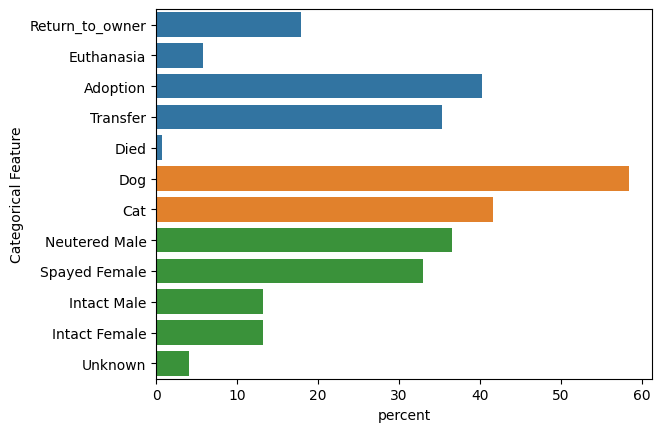

In [11]:
sns.countplot(y='OutcomeType', stat='percent', data=traindf)
sns.countplot(y='AnimalType', stat='percent', data=traindf)
sns.countplot(y='SexuponOutcome', stat='percent', data=traindf)
plt.ylabel('Categorical Feature')
plt.show()

In [12]:
print('Train Dataset:')
traindf.info()

Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AnimalID        26729 non-null  object
 1   Name            19038 non-null  object
 2   DateTime        26729 non-null  object
 3   OutcomeType     26729 non-null  object
 4   OutcomeSubtype  13117 non-null  object
 5   AnimalType      26729 non-null  object
 6   SexuponOutcome  26728 non-null  object
 7   AgeuponOutcome  26711 non-null  object
 8   Breed           26729 non-null  object
 9   Color           26729 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


In [13]:
print('Test Dataset:')
testdf.info()

Test Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11456 non-null  int64 
 1   Name            8231 non-null   object
 2   DateTime        11456 non-null  object
 3   AnimalType      11456 non-null  object
 4   SexuponOutcome  11456 non-null  object
 5   AgeuponOutcome  11450 non-null  object
 6   Breed           11456 non-null  object
 7   Color           11456 non-null  object
dtypes: int64(1), object(7)
memory usage: 716.1+ KB


# Cleaning the Dataset

To continue with any further analysis, the dataset is going to need to be cleaned. Most of the columns are strings type and categorical. Or there is numeric information that needs to be extracted, such as age.

> It's apparent that the dataset only considers dogs and cats. The categorical outcomes, represented in blue, are largely imbalanced. Thankfully, not many appear to pass away in the Austin Animal Center. But this will need to be addressed in how we train the

> Further, there are a few null values present in the table, like with name & sex upon outcome, and outcomesubtypes

In [14]:
"""
First, since there is only one value where the SexUponOutcome
is null, lets investigate if it's worth dropping it since we still have 26729 samples
"""
traindf.loc[traindf['SexuponOutcome'].isna()]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
3174,A667395,Diego,2013-11-27 16:11:00,Return_to_owner,NaN,Dog,NaN,7 years,Dachshund,Brown Merle


As we can see, 'Diego' belongs to the Return_to_owner class. 3rd largest class,
is part of the larger of the two groups of animals (Dog|Cat), and likely doesn't provide vital information to the model.

Further, this 1 exception among both subsets of the data leads me to believe Austin Animal Shelter is rather vigilant about recording this feature anyways. So it would be unlikely that future samples would have this feature nulled.

In [15]:
traindf = traindf.dropna(subset=['SexuponOutcome'], ignore_index=True)
testdf = testdf.dropna(subset=['SexuponOutcome'], ignore_index=True)
print(traindf.shape)
print(testdf.shape)

(26728, 10)
(11456, 8)


Next, we fill in the names of the animals with null values with 'unnamed' because there really isn't much alternative for option here. It would be unwise to drop the samples entirely, as there are a large number of them and we need as much data as possible.

In [16]:
traindf['Name'] = traindf['Name'].fillna('unnamed')
testdf['Name'] = testdf['Name'].fillna('unnamed')
traindf.head()

<ipython-input-16-017fc5d68a42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['Name'] = traindf['Name'].fillna('unnamed')


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,unnamed,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,unnamed,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [17]:
testdf.tail()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
11451,11452,unnamed,2014-07-08 14:50:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
11452,11453,unnamed,2014-10-21 12:57:00,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue
11453,11454,unnamed,2014-09-29 09:00:00,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico
11454,11455,Rambo,2015-09-05 17:16:00,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan
11455,11456,Gusto,2014-07-12 18:40:00,Dog,Intact Male,4 years,Labrador Retriever,Cream


Now for outcome subtype. I would like to point out that in the data obsereved, that the subtype appears to be more or less a condition or history the animal at the center was recorded to be in such as suffering, Foster, or perhaps an illness

This is likely an important feature, because humans may be more or less likely to adopt an animal with a little more history to them than an animal with no background. However, filling these simply with a copy of the first outcome sounds like a poor decision because it may unintentionally allow that feature to become heavier than others by a considerable amount in various algorithms.

However, there isn't anything about the animal's history we can assume from the data. Therefore, filling 'no history' should suffice. To preface, I initially thought that subtype outcomes would only be observed in cases where the animal was not later deceased, but that work will be shown below proving otherwise

In [18]:
traindf.loc[traindf['OutcomeSubtype'].isna()]['OutcomeType'].value_counts().sort_values(ascending=False)

,count
OutcomeType,
Adoption,8803
Return_to_owner,4785
Died,16
Transfer,6
Euthanasia,1


In [19]:
# filling with no history
traindf['OutcomeSubtype'] = traindf['OutcomeSubtype'].fillna('no history')
traindf.head()

<ipython-input-19-8d13160e245f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['OutcomeSubtype'] = traindf['OutcomeSubtype'].fillna('no history')


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,no history,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,unnamed,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,unnamed,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [20]:
"""
likewise, the testdf needs to assume no history, since we were not provided that feature
but will be using it in predictions
"""
testdf['OutcomeSubtype'] = 'no history'
testdf.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,OutcomeSubtype
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,no history
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,no history
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,no history
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,no history
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,no history


Finally, we need to process the missing ages. For this, we need to go ahead and make the values in the datasets numeric in nature. Group them by dog and cat categories, and get euclidean measures for distance.

- My rationale behind this is that we can compute distances between samples and take an average within a neighborhood of the closest samples.

- How does this make sense?
> Shelters and adoption centers commonly house animals with a variety of ages. However, the ages tend to be pretty close duing certain times of year, such as when adoption centers have a lot of puppies and kittens for adoption at once before an influx / surplus of elder animals are observed to be in a center. Have you ever noticed that visiting several shelter or center at different times, you may observe a lot more younger animals than older or vice versa?  This is an observation I made during my own adoption process with my adoptee cat, when there were a lot of kittens in the shelter with him, but plenty of elder dogs. At other times during my adoption story, the shelter would have lots of older cats but not a lot of kittens. I don't think its unreasonable to say that time of outcome has a large impact on the ages of animals that can be observed in the shelter together

- find evidence of this

In [21]:
# Define conversion factors for time to months,
# this could be done better, but key - val hash is fine
# Conversion factors to months with both plural and non-plural keys
conversion_factors = {
    'day': 1 / 30,        # 1 day = 1/30 months (approximately 0.0333)
    'days': 1 / 30,       # 1 day = 1/30 months (approximately 0.0333)
    'week': 1 / 4.33,     # 1 week = 1/4.33 months (approximately 0.2307)
    'weeks': 1 / 4.33,    # 1 week = 1/4.33 months (approximately 0.2307)
    'month': 1,           # 1 month = 1 month
    'months': 1,          # 1 month = 1 month
    'year': 12,           # 1 year = 12 months
    'years': 12           # 1 year = 12 months
}

# split the columns information
extracted = traindf['AgeuponOutcome'].str.split(' ', expand=True)
extracted[0] = extracted[0].astype('float64')
extracted[1]= extracted[1].astype('string')
extracted = extracted.rename(columns={0: 'age', 1:'unit'})
traindf = traindf.join(extracted)
traindf['age_months'] = traindf['age'] * traindf['unit'].map(conversion_factors)
traindf = traindf.drop(columns=['age', 'unit', 'AgeuponOutcome'], axis=1)
traindf.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,age_months
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,no history,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,12.000000
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,12.000000
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,24.000000
3,A683430,unnamed,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0.692841
4,A667013,unnamed,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,24.000000


In [22]:
# functions to change the remaining columns to their label types
# starting with the animal type, name, Breed and color
traindf['Name'],           unique_name_train    = pd.factorize(traindf['Name'])
traindf['OutcomeType'],    unique_outcome_train = pd.factorize(traindf['OutcomeType'])
traindf['OutcomeSubtype'], unique_subtype_train = pd.factorize(traindf['OutcomeSubtype'])
traindf['AnimalType'],     unique_animal_train  = pd.factorize(traindf['AnimalType'])
traindf['SexuponOutcome'], unique_sex_train     = pd.factorize(traindf['SexuponOutcome'])
traindf['Breed'],          unique_breed_train   = pd.factorize(traindf['Breed'])
traindf['Color'],          unique_color_train   = pd.factorize(traindf['Color'])

# I'm not sure if date AND time together should be considered, so split the date and time
# so we can weight their importance.
traindf['DateTime'] = pd.to_datetime(traindf['DateTime'])

# Extract various date and time components
traindf['year'] = traindf['DateTime'].dt.year
traindf['month'] = traindf['DateTime'].dt.month
traindf['day'] = traindf['DateTime'].dt.day
traindf['hour'] = traindf['DateTime'].dt.hour

In [23]:
# Drop useless columns
traindf = traindf.drop(columns=['AnimalID'], axis=1)
traindf = traindf.drop(columns=['DateTime'], axis=1)
traindf.head()

,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,age_months,year,month,day,hour
0,0,0,0,0,0,0,0,12.000000,2014,2,12,18
1,1,1,1,1,1,1,1,12.000000,2013,10,13,12
2,2,2,2,0,0,2,2,24.000000,2015,1,31,12
3,3,3,3,1,2,1,3,0.692841,2014,7,11,19
4,3,3,3,0,0,3,4,24.000000,2013,11,15,12


In [24]:
# repeat for test data
extracted = testdf['AgeuponOutcome'].str.split(' ', expand=True)
extracted[0] = extracted[0].astype('float64')
extracted[1]= extracted[1].astype('string')
extracted = extracted.rename(columns={0: 'age', 1:'unit'})
testdf = testdf.join(extracted)
testdf['age_months'] = testdf['age'] * testdf['unit'].map(conversion_factors)
testdf = testdf.drop(columns=['age', 'unit', 'AgeuponOutcome'], axis=1)

# lets use some pre-built functions to change the remaining columns to their label types
# starting with the animal type, name, Breed and colorunique_name_train

testdf['Name'],           unique_name_test    = pd.factorize(testdf['Name'])
testdf['AnimalType'],     unique_animal_test  = pd.factorize(testdf['AnimalType'])
testdf['SexuponOutcome'], unique_sex_test     = pd.factorize(testdf['SexuponOutcome'])
testdf['Breed'],          unique_breed_test   = pd.factorize(testdf['Breed'])
testdf['Color'],          unique_color_test   = pd.factorize(testdf['Color'])
testdf['OutcomeSubtype'] = 0 # no history is mapped to 0s

testdf['DateTime'] = pd.to_datetime(testdf['DateTime'])

# Extract various date and time components
testdf['year']  = testdf['DateTime'].dt.year
testdf['month'] = testdf['DateTime'].dt.month
testdf['day']   = testdf['DateTime'].dt.day
testdf['hour']  = testdf['DateTime'].dt.hour

# well go ahead and drop the ID, it isn't going to give us information about the animal and its more of an index
testdf = testdf.drop(columns=['ID'], axis=1)
testdf = testdf.drop(columns=['DateTime'], axis=1)
testdf.head()

,Name,AnimalType,SexuponOutcome,Breed,Color,OutcomeSubtype,age_months,year,month,day,hour
0,0,0,0,0,0,0,10.0,2015,10,12,12
1,1,0,1,1,1,0,24.0,2014,7,26,17
2,2,1,2,2,2,0,12.0,2016,1,13,12
3,3,0,3,3,3,0,4.0,2013,12,28,18
4,4,0,2,4,4,0,24.0,2015,9,24,17


In [25]:
# remove the column age since na values we are filling are here
distance_matrix = traindf.drop(columns=['age_months'], axis=1)

# compute pairwise distances
distance_matrix = pairwise_distances_chunked(distance_matrix)

distances = []
for chunk in distance_matrix:
  # I do this so that the size can be cut down and fit into a single matrix
  # by reducing the size by a factor of 2, since the age average will be averaged anyways and
  # fractional ages of a month past 32 bits doesn't sound reasonable
  distances.append(chunk.astype(np.float32))
distances = np.concatenate(distances)
np.fill_diagonal(distances, np.inf) # so this index won't be grabbed later, done in place

In [26]:
# select k values to average over
k = 5
na_indices = traindf.index[traindf['age_months'].isna()].to_list()
# stop datapoints with missing values from being close with each other
distances = pd.DataFrame(distances)
distances = distances.drop(na_indices, axis=1)

# since we are only interested in the rows that are missing age values, lets get those indices and free memory
interests = distances.iloc[na_indices]
close_points = []
for na_index, (_, row) in zip(na_indices, interests.iterrows()):
  close_points.append(row.nsmallest(k).index)
del interests
del distance_matrix

In [27]:
close_points = pd.DataFrame(close_points, index=na_indices)
close_points

,0,1,2,3,4
2480,15489,11033,12569,8501,9124
2912,15493,13668,14690,17192,24568
3765,5380,1556,13316,26184,24399
3874,21029,12215,21625,19999,16786
4497,345,3746,14755,4195,11678
5136,20487,4737,6791,15777,17263
5690,9118,3004,20365,3969,7094
7004,17263,4737,6791,13149,18530
8419,15489,11033,12569,8501,9124
17463,2992,6953,6540,16693,24056


In [28]:
# we can see the values don't contain themselves or each other in the output. Horray!
# Now to extract the ages from the set and average them >:)
for ind, row in close_points.iterrows():
    traindf.at[ind, 'age_months'] = traindf.iloc[row]['age_months'].mean()
traindf['age_months'] = traindf['age_months']
traindf.info() # to verify all the nulls were filled :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26728 entries, 0 to 26727
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            26728 non-null  int64  
 1   OutcomeType     26728 non-null  int64  
 2   OutcomeSubtype  26728 non-null  int64  
 3   AnimalType      26728 non-null  int64  
 4   SexuponOutcome  26728 non-null  int64  
 5   Breed           26728 non-null  int64  
 6   Color           26728 non-null  int64  
 7   age_months      26728 non-null  float64
 8   year            26728 non-null  int32  
 9   month           26728 non-null  int32  
 10  day             26728 non-null  int32  
 11  hour            26728 non-null  int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 2.0 MB


In [29]:
# repeating for the test set.

# remove the column age since na values.
distance_matrix = testdf.drop(columns=['age_months'], axis=1)

# compute pairwise distances
distance_matrix = pairwise_distances_chunked(distance_matrix)

distances = []
for chunk in distance_matrix:
  # I do this so that the size can be cut down and fit into a single matrix
  # by reducing the size by a factor of 2, since the age average will be averaged anyways and
  # fractional ages of a month past 32 bits doesn't sound reasonable
  distances.append(chunk.astype(np.float32))
distances = np.concatenate(distances)
np.fill_diagonal(distances, np.inf) # so this index won't be grabbed later, done in place

# select k values to average over
k = 5
na_indices = testdf.index[testdf['age_months'].isna()].to_list()
# stop datapoints with missing values from being close with each other
distances = pd.DataFrame(distances)
distances = distances.drop(na_indices, axis=1)

# since we are only interested in the rows that are missing age values, lets get those indices and free memory
interests = distances.iloc[na_indices]
close_points = []
for na_index, (_, row) in zip(na_indices, interests.iterrows()):
  close_points.append(row.nsmallest(k).index)
del interests
del distance_matrix

close_points = pd.DataFrame(close_points, index=na_indices)
close_points

,0,1,2,3,4
763,2149,9393,8264,1692,9688
2498,4612,1750,3965,9526,5147
6323,8052,9185,5992,5713,2783
6347,11036,1014,8593,11243,6847
7626,5603,2149,7027,427,9286
10754,6847,4166,9191,9579,4927


In [30]:
# we can see the values don't contain themselves or each other in the output. Horray!
# Now to extract the ages from the set and average them >:)
for ind, row in close_points.iterrows():
    testdf.at[ind, 'age_months'] = testdf.iloc[row]['age_months'].mean()
testdf['age_months'] = testdf['age_months']
testdf.info() # to verify all the nulls were filled :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            11456 non-null  int64  
 1   AnimalType      11456 non-null  int64  
 2   SexuponOutcome  11456 non-null  int64  
 3   Breed           11456 non-null  int64  
 4   Color           11456 non-null  int64  
 5   OutcomeSubtype  11456 non-null  int64  
 6   age_months      11456 non-null  float64
 7   year            11456 non-null  int32  
 8   month           11456 non-null  int32  
 9   day             11456 non-null  int32  
 10  hour            11456 non-null  int32  
dtypes: float64(1), int32(4), int64(6)
memory usage: 805.6 KB


Might wonder why I didn't use groupby to weigh cat ages with cat ages and dog ages with dog ages.

Well, you see, already making an assumption of the age like this is is likely to not hold much merit and be worth that effort upfront. It was also a small subset of the data (18 samples)

> Later, I will try grouping to see if dogs and cats have different features that make them become adopted. Such as cats being more dependent on age and dogs with background or something.

# Statistical look at the Data

Now that we have the data in all-numeric values we can interpret and compute with,
we can plot a lot more than before! Hopefully we observe some interesting trends with the data

For simplicity, I will use the traindf and testdf to keep track of our original labels, like 'dog' and 'cat' so we don't get lost in all the numbered codes.

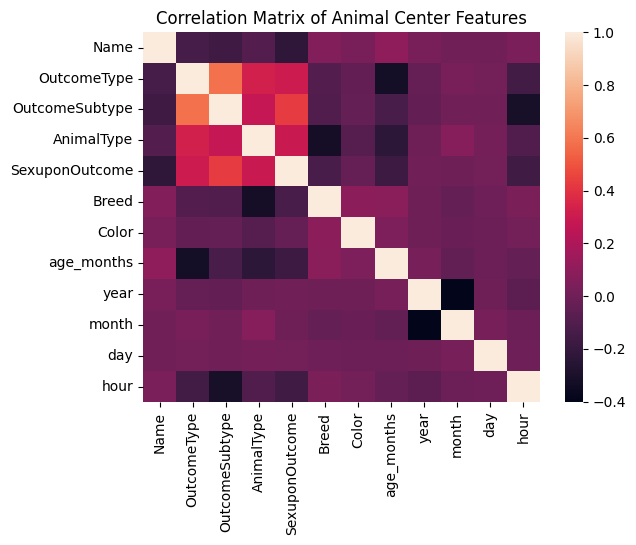

In [31]:
corr = traindf.corr()
sns.heatmap(corr)
plt.title('Correlation Matrix of Animal Center Features')
plt.show()

Looks like the outcome type is more correlated with outcome subtype and age. However, the outcome subtype is HEAVILY imbalanced. So not much can be concluded from the heat map alone

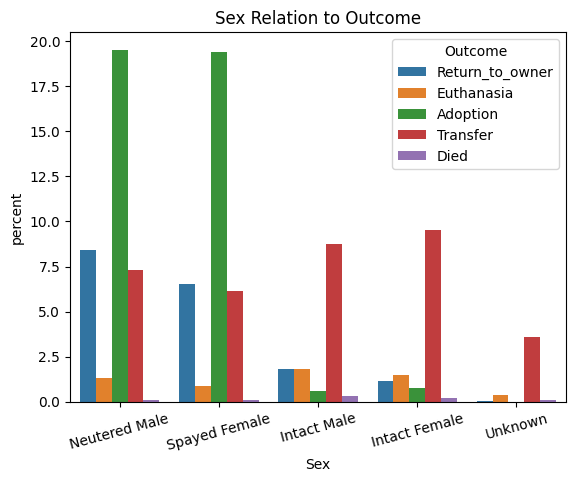

In [32]:
traindf['Outcome'] = unique_outcome_train[traindf['OutcomeType']]
traindf['Sex'] = unique_sex_train[traindf['SexuponOutcome']]
sns.countplot(traindf, x='Sex', stat='percent', hue='Outcome')
plt.xticks(rotation=15)
plt.title('Sex Relation to Outcome')
plt.show()

It looks like Adoption is most common with animals that were spayed or neutered at the time, or otherwise found owners. However, intact males and females saw a decrease of this trend. Other categories don't seem to benefit from this data. If we were using a decision tree or random forest, we could likely extract a lot of adoptions early based on this observation. However, this is more like a 'leaving the shelter system' observation rather than an adoption / return predictor

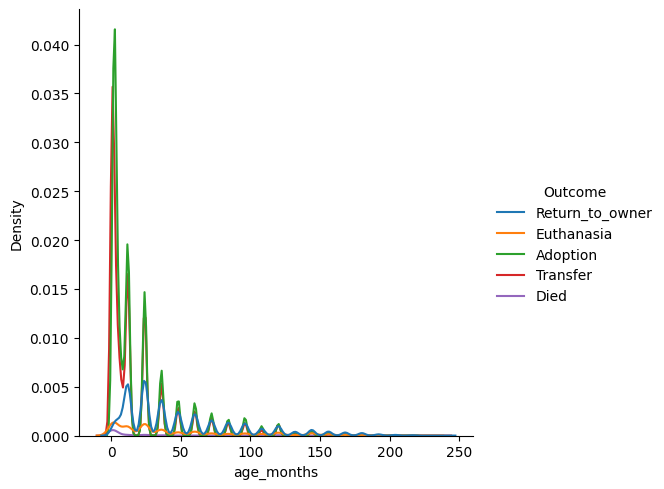

In [33]:
#binwidth set to 12 months for visualization
sns.displot(traindf, x='age_months', kind='kde', bw_adjust=0.3,
            hue='Outcome')
plt.show()

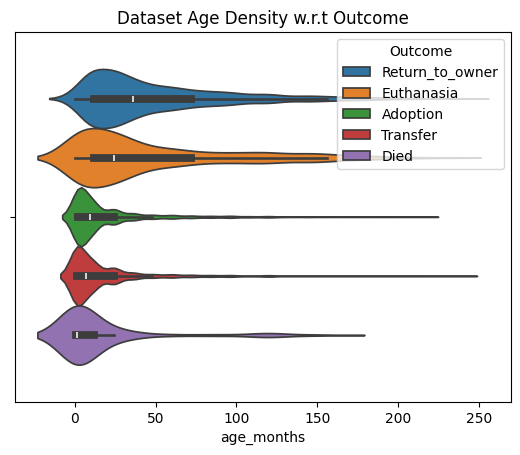

In [34]:
sns.violinplot(data=traindf, x='age_months', hue='Outcome')
plt.title('Dataset Age Density w.r.t Outcome')
plt.show()

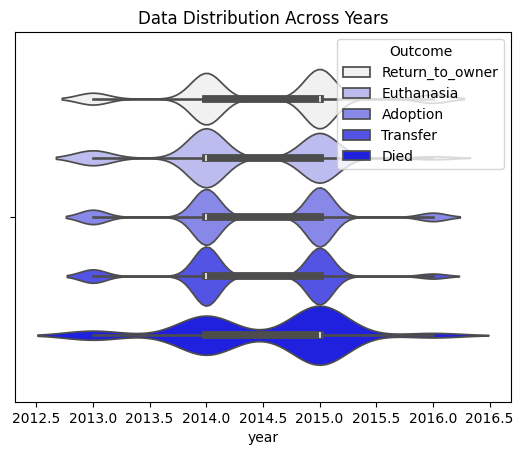

In [35]:
sns.violinplot(data=traindf, x='year', palette="light:blue", hue='Outcome')
plt.title('Data Distribution Across Years')
plt.show()

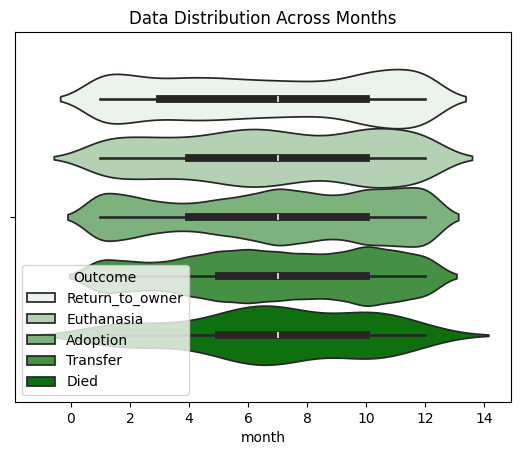

In [36]:
sns.violinplot(data=traindf, x='month', palette='light:green', hue='Outcome')
plt.title('Data Distribution Across Months')
plt.show()

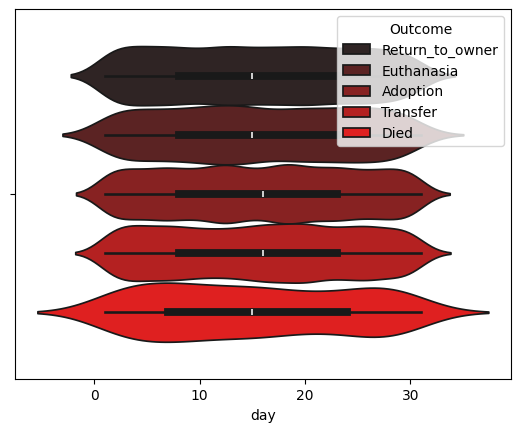

In [37]:
sns.violinplot(data=traindf, x='day', palette='dark:red', hue='Outcome')
plt.show()

<Axes: xlabel='hour'>

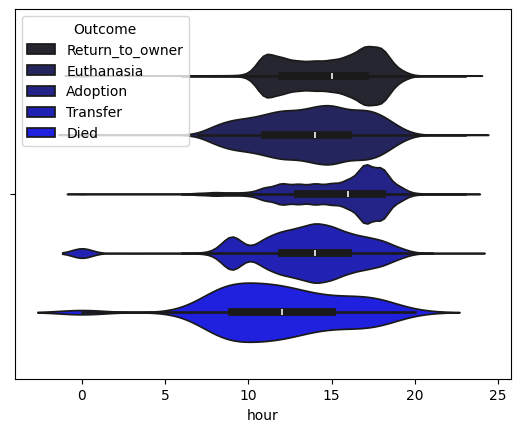

In [38]:
sns.violinplot(data=traindf, x='hour', palette='dark:blue', hue='Outcome')

Text(0.5, 1.0, 'Animal History Explaining Outcome')

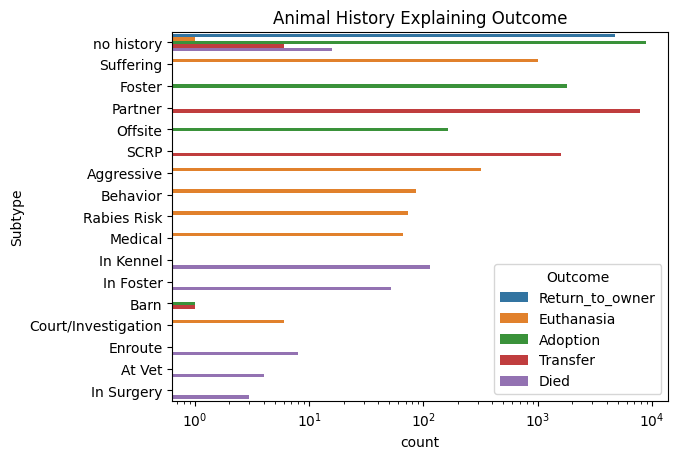

In [39]:
traindf['Subtype'] = unique_subtype_train[traindf['OutcomeSubtype']]
sns.countplot(data=traindf, y='Subtype', stat='count', hue='Outcome')
plt.xscale('log')
plt.title('Animal History Explaining Outcome')

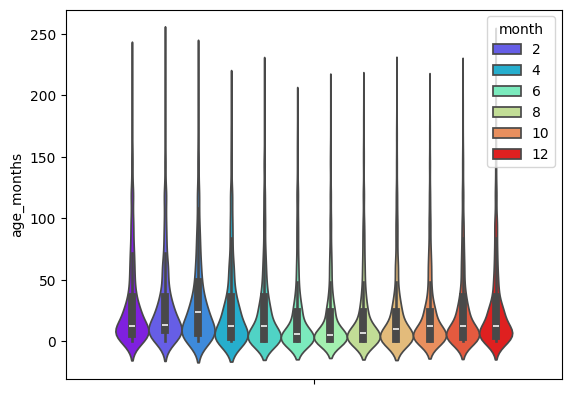

In [40]:
# see distribution of animal ages based on months
sns.violinplot(data=traindf, y='age_months', palette="rainbow", hue='month')
plt.show()

It looks like elder animals may correlate with returns to owners, younger sees more transfers, and in between has large values for adoptions. Euthanasia occurs most commonly with elder animals.

A lot of data is categorical, so besides countplots, histograms, and kde plots, I am not sure what else I can show.

In [41]:
traindf['Animal'] = unique_animal_train[traindf['AnimalType']]
traindf.describe()

,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,age_months,year,month,day,hour
count,26728.000000,26728.000000,26728.000000,26728.000000,26728.000000,26728.000000,26728.000000,26728.000000,26728.000000,26728.000000,26728.000000,26728.000000
mean,1294.606069,1.951025,1.588110,0.416567,1.151414,101.804961,30.722987,26.113506,2014.430784,6.925584,15.697920,14.445338
std,1672.218503,1.074208,1.951602,0.492999,1.169770,220.206608,40.248973,35.579125,0.741370,3.495846,8.770388,3.337380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,10.000000,2.000000,2014.000000,4.000000,8.000000,12.000000
50%,493.000000,2.000000,0.000000,0.000000,1.000000,16.000000,18.000000,12.000000,2014.000000,7.000000,16.000000,15.000000
75%,2045.000000,3.000000,3.000000,1.000000,2.000000,75.000000,34.000000,36.000000,2015.000000,10.000000,23.000000,17.000000
max,6374.000000,4.000000,16.000000,1.000000,4.000000,1379.000000,365.000000,240.000000,2016.000000,12.000000,31.000000,23.000000


Doing the same thing but with cats and dogs grouped separately...

In [42]:
cats = traindf.loc[traindf['Animal'] == 'Cat']
dogs = traindf.loc[traindf['Animal'] == 'Dog']

In [43]:
# cleanup for the cats and dogs
traindf = traindf.drop(columns=['Animal'], axis=1)
cats = cats.drop(columns=['Animal', 'AnimalType'], axis=1)
dogs = dogs.drop(columns=['Animal', 'AnimalType'], axis=1)

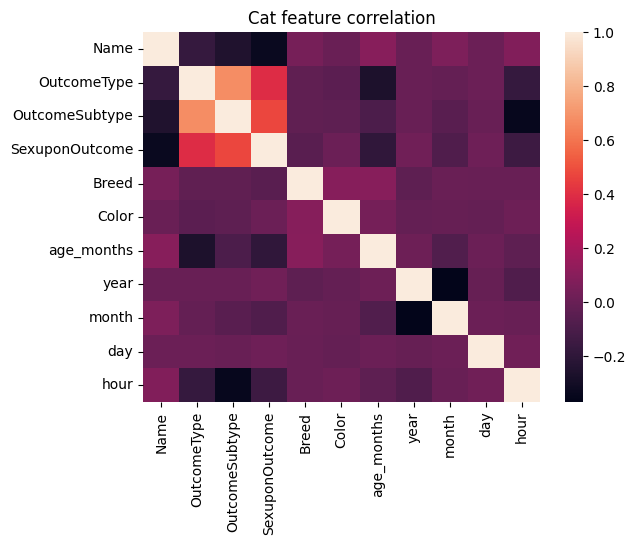

In [44]:
catscorr = cats.loc[:,:'hour'].corr()
sns.heatmap(catscorr)
plt.title('Cat feature correlation')
plt.show()

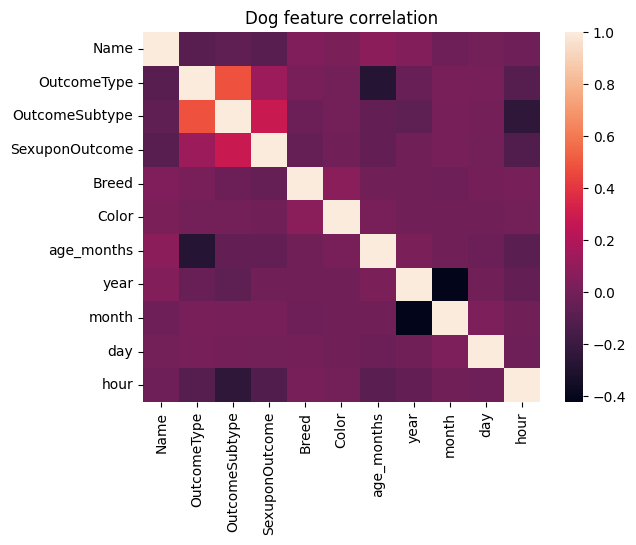

In [45]:
dogscorr = dogs.loc[:, :'hour'].corr()
sns.heatmap(dogscorr)
plt.title('Dog feature correlation')
plt.show()

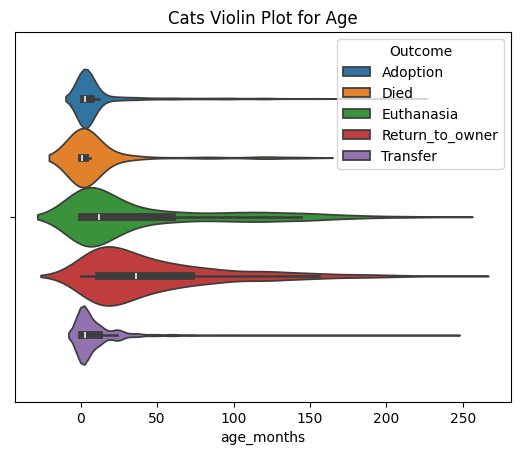

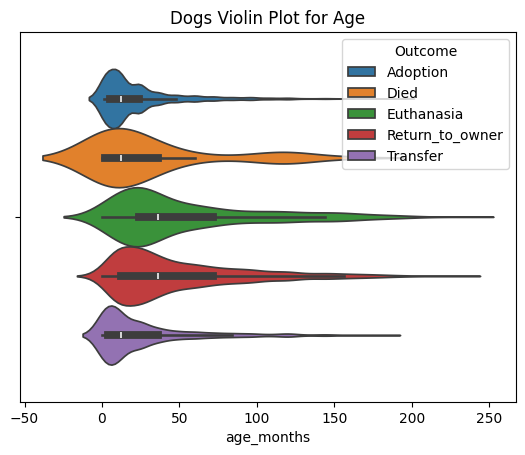

In [46]:
# So that same hues get used across plots, sort
cats.sort_values(by='Outcome', ascending=True, inplace=True)
dogs.sort_values(by='Outcome', ascending=True, inplace=True)

sns.violinplot(cats, x='age_months', hue='Outcome')
plt.title('Cats Violin Plot for Age')
plt.show()

sns.violinplot(dogs, x='age_months', hue='Outcome')
plt.title('Dogs Violin Plot for Age')
plt.show()

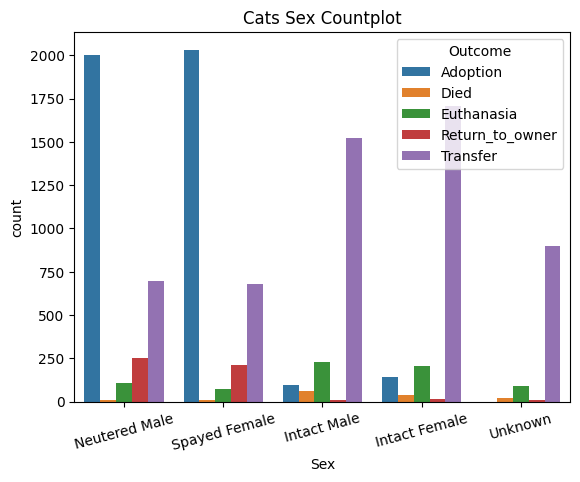

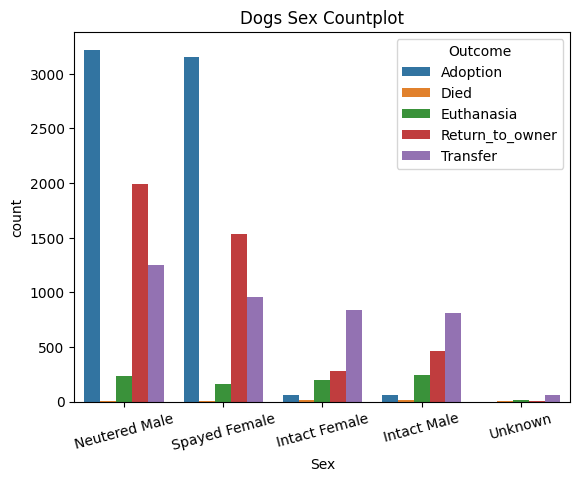

In [47]:
sns.countplot(cats, x='Sex', hue='Outcome')
plt.title('Cats Sex Countplot')
plt.xticks(rotation=15)
plt.show()
sns.countplot(dogs, x='Sex', hue='Outcome')
plt.title('Dogs Sex Countplot')
plt.xticks(rotation=15)
plt.show()

In [48]:
# cleanup - keep outcome because we can use it for fetching the encoding later!!
traindf = traindf.drop(columns=['Sex', 'Subtype'], axis=1)
cats = cats.drop(columns=['Sex', 'Subtype'], axis=1)
dogs = dogs.drop(columns=['Sex', 'Subtype'], axis=1)

The data is a LOT more telling when we split between cats and dogs. So it's worth investigating between training two types of models to cats and dogs separately and allowing predictions to run between two different models since the data has differing outcomes between the two that were previously masked. This is also one less feature to train over the models. Though it may be longer to train two models, we need exponentially less data to generalize - Curse of Dimensionality

From adjusting the bin-widths, I also noticed the data is multimodal and not guassian. So standardization would not make much since and instead normalization using a min-max scaler on my data should be used. (Why?)

I am going to avoid models and approaches that assume the data is guassian. PCA will be used later to try a naiive bayes classifier

# Initial ML Analysis

In [49]:
# Imports for ML specific things
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

## Preparing the data for ML
I need to split the train data to train and test sets, because the original test data does not have Outcome Types I can predict on. I will be targetting roughly a 80%-20% Train - Test split on my data.

To achieve this, I have to take 80% of the rows in my tables, and do:

Luckily, this is easily achieved by selecting K=5. Because your data will see K-1 / K in the train set. 4/5 is 80% exactly for all folds.

In [50]:
all_outcomes = traindf[['OutcomeType', 'Outcome']]
cats_outcomes = cats[['OutcomeType', 'Outcome']]
dogs_outcomes = dogs[['OutcomeType', 'Outcome']]

# drop the outcomes
all_features = traindf.drop(columns=['Outcome','OutcomeType'], axis=1)
cats_features = cats.drop(columns=['Outcome','OutcomeType'], axis=1)
dogs_features = dogs.drop(columns=['Outcome','OutcomeType'], axis=1)

# Normalize the data
scaler = MinMaxScaler()
all_scaled = scaler.fit_transform(all_features)
scaler = MinMaxScaler()
cats_scaled = pd.DataFrame(scaler.fit_transform(cats_features))
scaler = MinMaxScaler()
dogs_scaled = pd.DataFrame(scaler.fit_transform(dogs_features))

all_data_train, all_data_test, all_truth_train, all_truth_test = train_test_split(all_scaled, all_outcomes, test_size=0.2, random_state=0)
cats_data_train, cats_data_test, cats_truth_train, cats_truth_test = train_test_split(cats_scaled, cats_outcomes, test_size=0.2, random_state=0)
dogs_data_train, dogs_data_test, dogs_truth_train, dogs_truth_test = train_test_split(dogs_scaled, dogs_outcomes, test_size=0.2, random_state=0)

In [51]:
# create an outcome to number map
label_mapping = dict(zip(all_truth_test['OutcomeType'], all_truth_test['Outcome']))
# Sort the dictionary by numeric keys to ensure correct order
all_decoded_labels = [label_mapping[key] for key in sorted(label_mapping.keys())]

label_mapping = dict(zip(cats_truth_test['OutcomeType'], cats_truth_test['Outcome']))
# Sort the dictionary by numeric keys to ensure correct order
cats_decoded_labels = [label_mapping[key] for key in sorted(label_mapping.keys())]

# create an outcome to number map
label_mapping = dict(zip(dogs_truth_test['OutcomeType'], dogs_truth_test['Outcome']))
# Sort the dictionary by numeric keys to ensure correct order
dogs_decoded_labels = [label_mapping[key] for key in sorted(label_mapping.keys())]

In [52]:
all_rf_model = RandomForestClassifier(random_state=0)
cats_rf_model = RandomForestClassifier(random_state=0)
dogs_rf_model = RandomForestClassifier(random_state=0)

all_rf_model.fit(all_data_train, all_truth_train['OutcomeType'])
cats_rf_model.fit(cats_data_train, cats_truth_train['OutcomeType'])
dogs_rf_model.fit(dogs_data_train, dogs_truth_train['OutcomeType'])

RandomForestClassifier(random_state=0)

In [53]:
all_test_predictions = all_rf_model.predict(all_data_test)
cats_test_predictions = cats_rf_model.predict(cats_data_test)
dogs_test_predictions = dogs_rf_model.predict(dogs_data_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       917
           1       0.98      1.00      0.99       321
           2       0.84      0.87      0.85      2190
           3       1.00      1.00      1.00      1881
           4       0.97      0.78      0.87        37

    accuracy                           0.87      5346
   macro avg       0.89      0.85      0.87      5346
weighted avg       0.87      0.87      0.87      5346



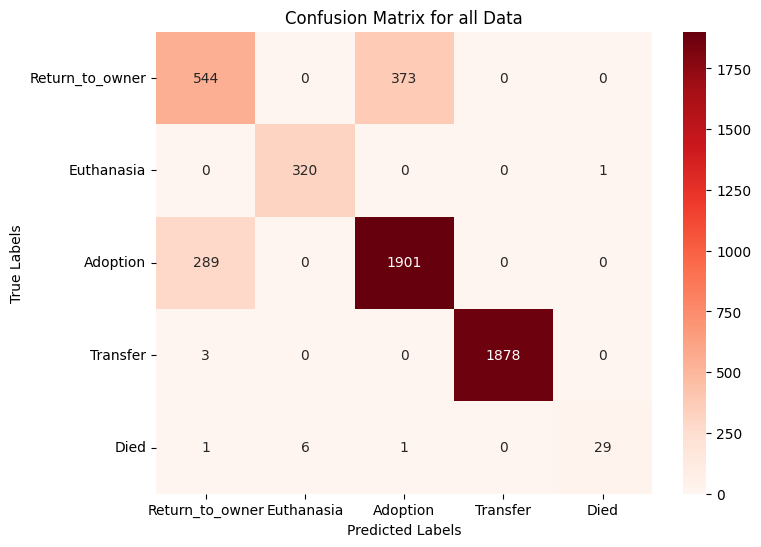

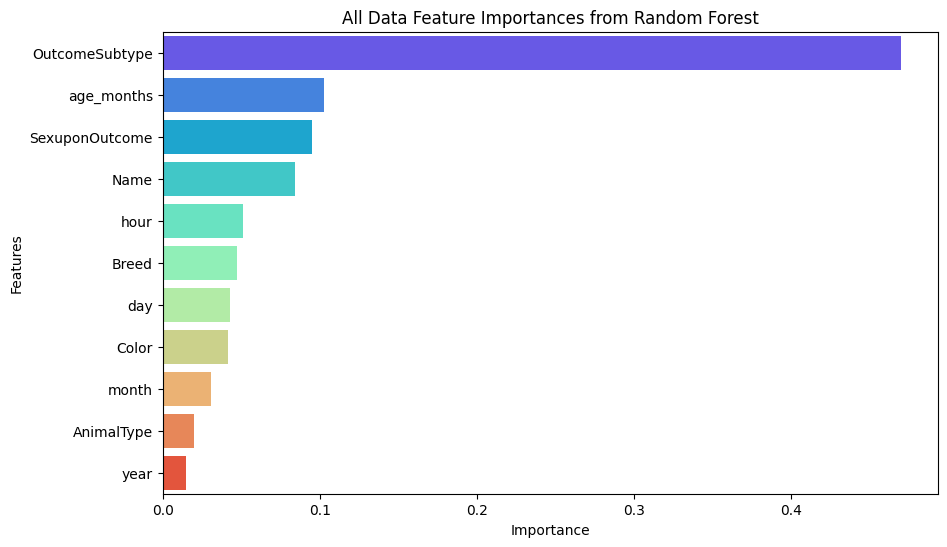

In [54]:
# Get a full classification report
print("\nClassification Report:")
print(classification_report(all_truth_test['OutcomeType'], all_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(all_truth_test['OutcomeType'], all_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap (
    conf_matrix, annot=True, fmt='d', cmap='Reds',
    xticklabels=all_decoded_labels, yticklabels=all_decoded_labels
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for all Data')
plt.show()

# Get feature importances from the trained Random Forest model
importances = all_rf_model.feature_importances_
features = all_features.columns
feature_importances = pd.DataFrame({
    'Importance': importances,
    'Features': features
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance',y='Features', data=feature_importances, hue='Features', palette='rainbow')
plt.title('All Data Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.24      0.33        96
           1       0.99      0.98      0.99       140
           2       0.92      0.97      0.94       840
           3       1.00      1.00      1.00      1118
           4       0.91      0.91      0.91        33

    accuracy                           0.95      2227
   macro avg       0.87      0.82      0.83      2227
weighted avg       0.95      0.95      0.95      2227



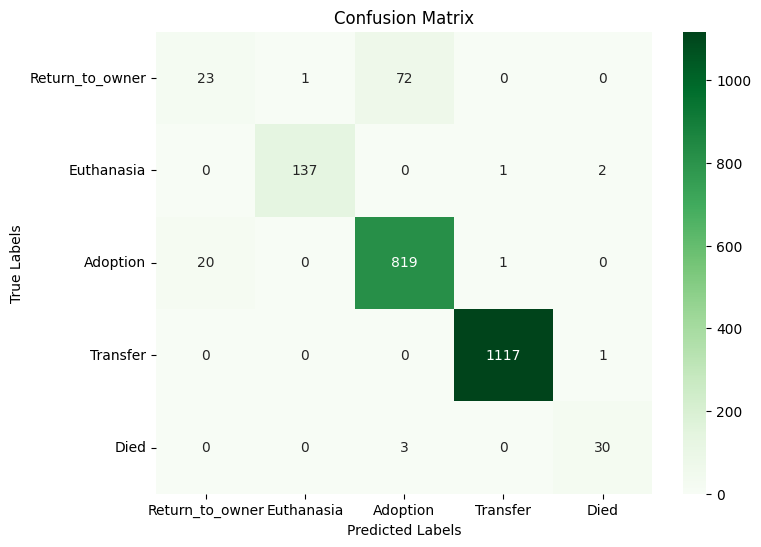

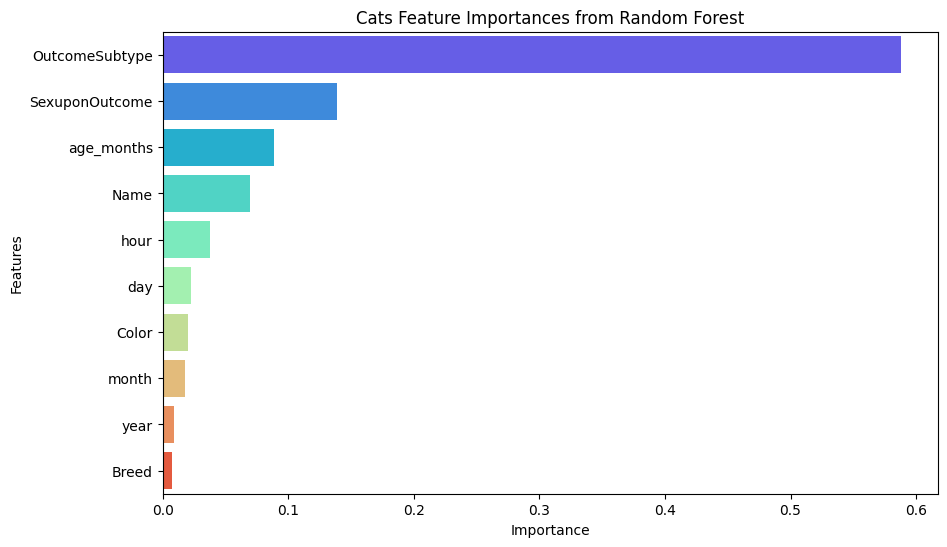

In [55]:
# Get a full classification report
print("\nClassification Report:")
print(classification_report(cats_truth_test['OutcomeType'], cats_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(cats_truth_test['OutcomeType'], cats_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap (
    conf_matrix, annot=True, fmt='d', cmap='Greens',
    xticklabels=cats_decoded_labels, yticklabels=cats_decoded_labels
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Get feature importances from the trained Random Forest model
importances = cats_rf_model.feature_importances_
features = cats_features.columns
feature_importances = pd.DataFrame({
    'Importance': importances,
    'Features': features
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance',y='Features', data=feature_importances, hue='Features', palette='rainbow')
plt.title('Cats Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       868
           1       0.96      0.99      0.98       156
           2       0.76      0.81      0.78      1285
           3       1.00      1.00      1.00       802
           4       1.00      0.12      0.22         8

    accuracy                           0.81      3119
   macro avg       0.88      0.71      0.73      3119
weighted avg       0.81      0.81      0.81      3119



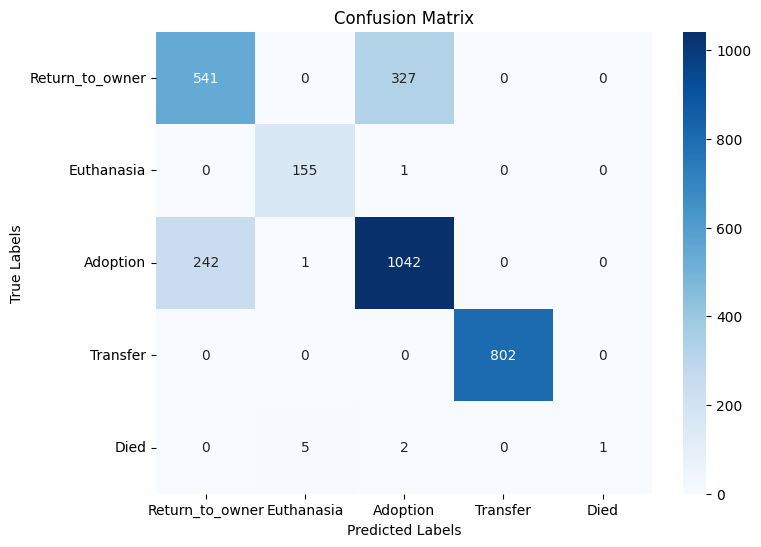

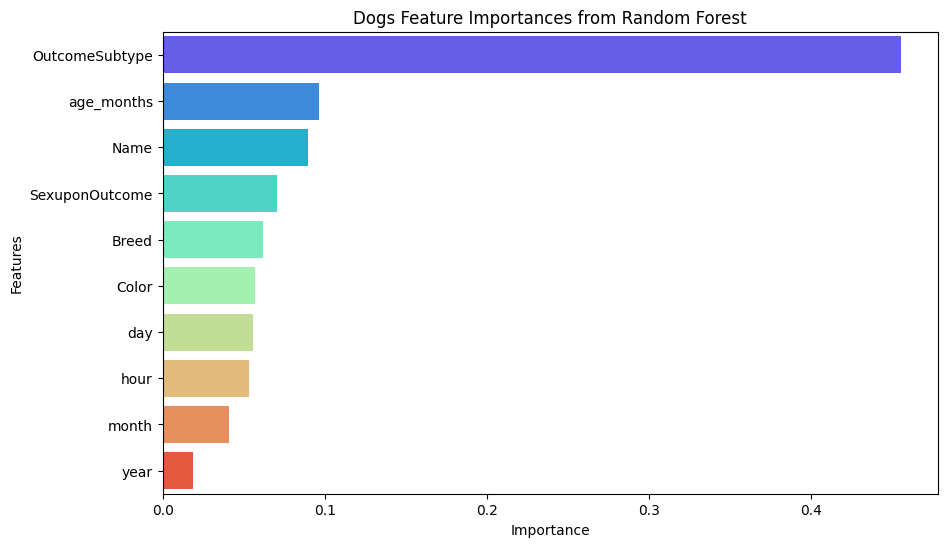

In [56]:
# Alternatively, get a full classification report
print("\nClassification Report:")
print(classification_report(dogs_truth_test['OutcomeType'], dogs_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(dogs_truth_test['OutcomeType'], dogs_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
   xticklabels=dogs_decoded_labels, yticklabels=dogs_decoded_labels
)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Get feature importances from the trained Random Forest model
importances = dogs_rf_model.feature_importances_
features = dogs_features.columns
feature_importances = pd.DataFrame({
    'Importance': importances,
    'Features': features
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance',y='Features', hue='Features', data=feature_importances, palette='rainbow')
plt.title('Dogs Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [57]:
# Trying other models with base benchmark
from sklearn.svm import SVC


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.77      0.63       917
           1       0.69      0.85      0.77       321
           2       0.87      0.67      0.76      2190
           3       0.97      0.96      0.97      1881
           4       0.70      0.84      0.77        37

    accuracy                           0.80      5346
   macro avg       0.75      0.82      0.78      5346
weighted avg       0.83      0.80      0.81      5346



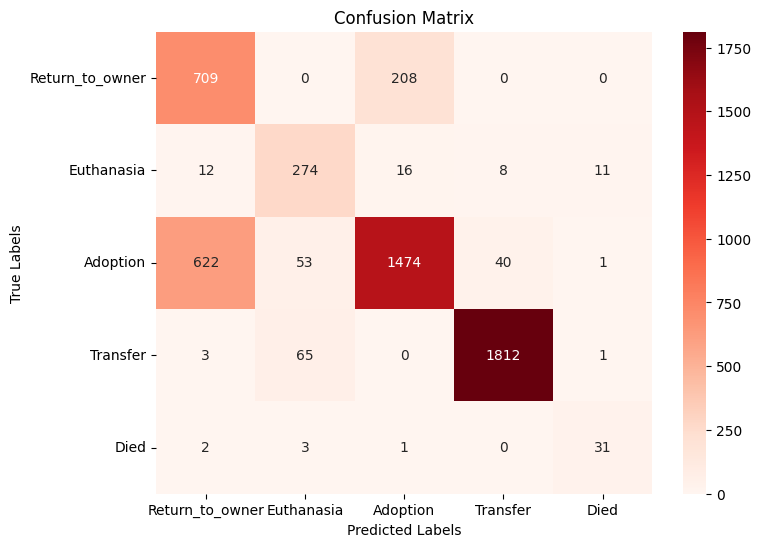

In [58]:
# Train an SVM classifier
all_svm_clf = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)  # Radial basis function kernel, common for SVM
all_svm_clf.fit(all_data_train, all_truth_train['OutcomeType'])

# Make predictions
all_test_predictions = all_svm_clf.predict(all_data_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(all_truth_test['OutcomeType'], all_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(all_truth_test['OutcomeType'], all_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=all_decoded_labels, yticklabels=all_decoded_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.65      0.37        96
           1       0.84      0.86      0.85       140
           2       0.94      0.75      0.83       840
           3       0.98      1.00      0.99      1118
           4       0.83      0.91      0.87        33

    accuracy                           0.88      2227
   macro avg       0.77      0.83      0.78      2227
weighted avg       0.92      0.88      0.89      2227



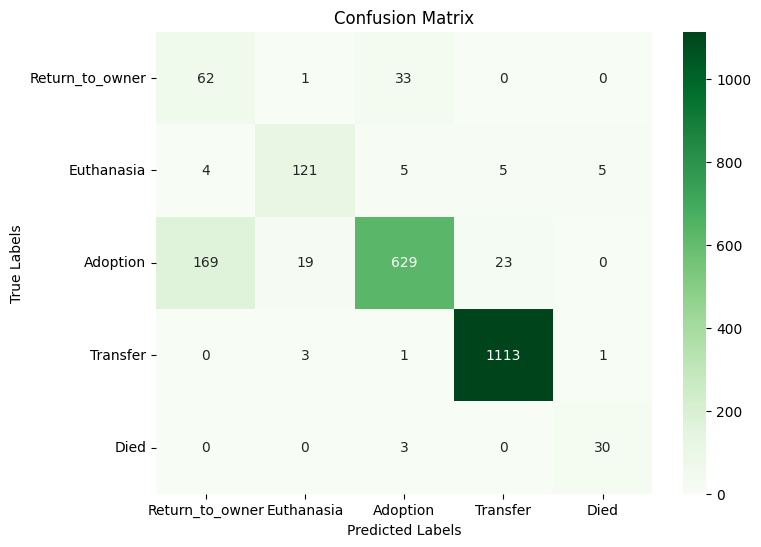

In [59]:
# Train an SVM classifier
cats_svm_clf = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)  # Radial basis function kernel, common for SVM
cats_svm_clf.fit(cats_data_train, cats_truth_train['OutcomeType'])

# Make predictions
cats_test_predictions = cats_svm_clf.predict(cats_data_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(cats_truth_test['OutcomeType'], cats_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(cats_truth_test['OutcomeType'], cats_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=cats_decoded_labels, yticklabels=cats_decoded_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       868
           1       0.71      0.88      0.79       156
           2       0.74      0.74      0.74      1285
           3       0.93      0.95      0.94       802
           4       0.36      0.50      0.42         8

    accuracy                           0.77      3119
   macro avg       0.68      0.74      0.71      3119
weighted avg       0.76      0.77      0.76      3119



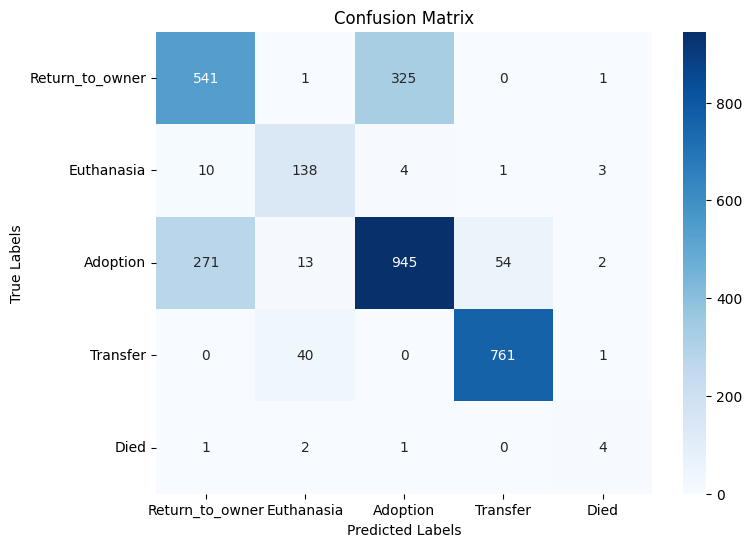

In [60]:
# Train an SVM classifier
dogs_svm_clf = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)  # Radial basis function kernel, common for SVM
dogs_svm_clf.fit(dogs_data_train, dogs_truth_train['OutcomeType'])

# Make predictions
dogs_test_predictions = dogs_svm_clf.predict(dogs_data_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(dogs_truth_test['OutcomeType'], dogs_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(dogs_truth_test['OutcomeType'], dogs_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=dogs_decoded_labels, yticklabels=dogs_decoded_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.44      0.45       917
           1       0.63      0.31      0.41       321
           2       0.71      0.80      0.75      2190
           3       0.86      0.85      0.85      1881
           4       0.93      0.38      0.54        37

    accuracy                           0.72      5346
   macro avg       0.72      0.55      0.60      5346
weighted avg       0.72      0.72      0.71      5346



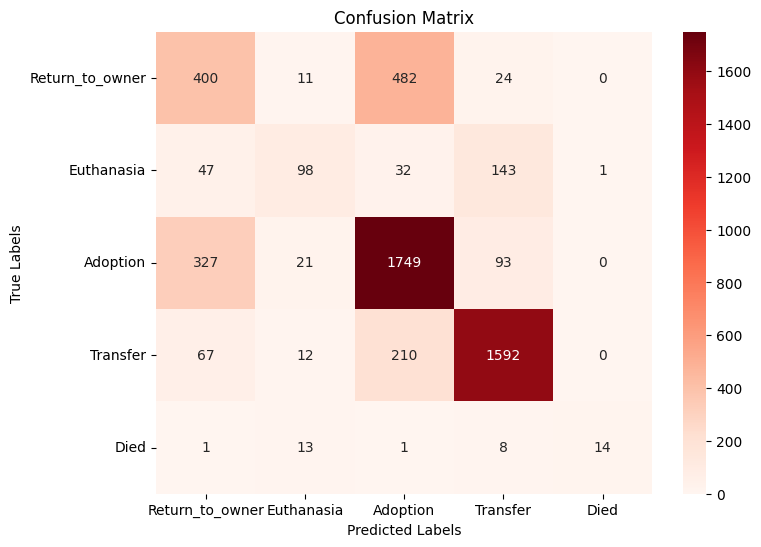

In [61]:
from sklearn.neighbors import KNeighborsClassifier
# Train a KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(all_data_train, all_truth_train['OutcomeType'])

# Make predictions
all_test_predictions = knn_clf.predict(all_data_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(all_truth_test['OutcomeType'], all_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(all_truth_test['OutcomeType'], all_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=all_decoded_labels, yticklabels=all_decoded_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.14      0.18        96
           1       0.59      0.29      0.39       140
           2       0.82      0.88      0.85       840
           3       0.88      0.93      0.91      1118
           4       0.91      0.64      0.75        33

    accuracy                           0.83      2227
   macro avg       0.69      0.58      0.61      2227
weighted avg       0.81      0.83      0.82      2227



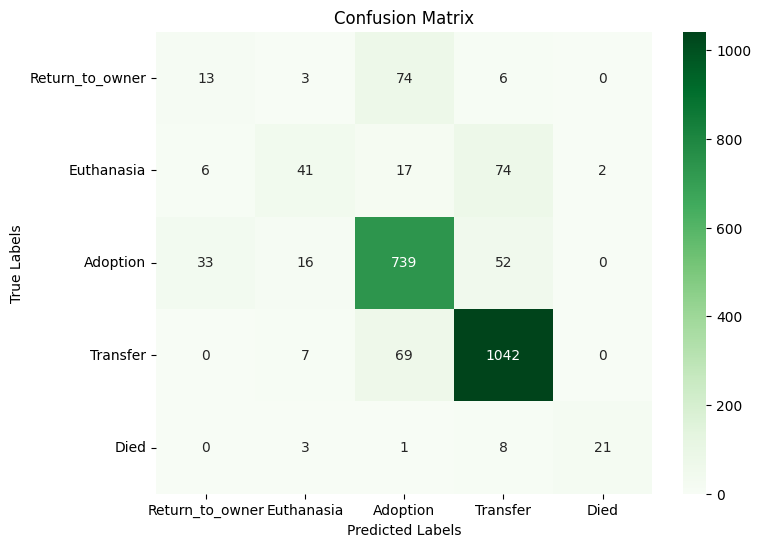

In [62]:
# Train a KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(cats_data_train, cats_truth_train['OutcomeType'])

# Make predictions
cats_test_predictions = knn_clf.predict(cats_data_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(cats_truth_test['OutcomeType'], cats_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(cats_truth_test['OutcomeType'], cats_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=cats_decoded_labels, yticklabels=cats_decoded_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.48      0.50       868
           1       0.69      0.26      0.38       156
           2       0.63      0.74      0.68      1285
           3       0.79      0.75      0.77       802
           4       0.67      0.25      0.36         8

    accuracy                           0.65      3119
   macro avg       0.66      0.50      0.54      3119
weighted avg       0.65      0.65      0.64      3119



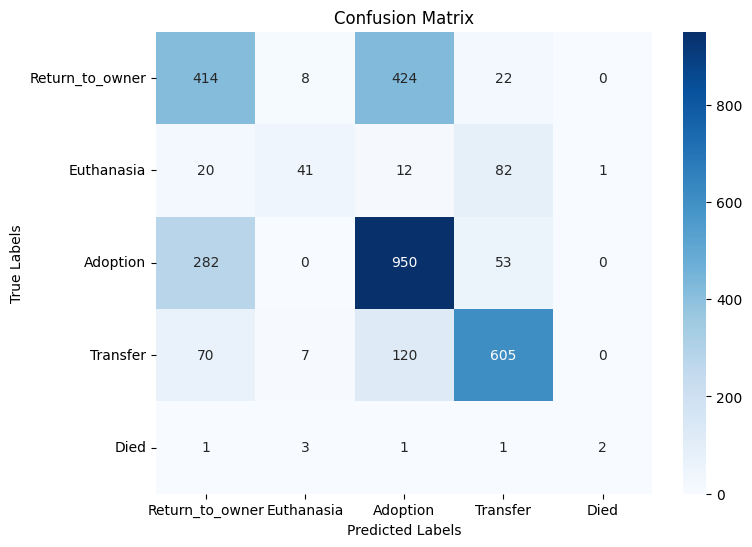

In [63]:
# Train a KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(dogs_data_train, dogs_truth_train['OutcomeType'])

# Make predictions
dogs_test_predictions = knn_clf.predict(dogs_data_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(dogs_truth_test['OutcomeType'], dogs_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(dogs_truth_test['OutcomeType'], dogs_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=dogs_decoded_labels, yticklabels=dogs_decoded_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       917
           1       0.44      0.44      0.44       321
           2       0.76      0.79      0.78      2190
           3       0.91      0.91      0.91      1881
           4       0.85      0.78      0.82        37

    accuracy                           0.76      5346
   macro avg       0.70      0.68      0.69      5346
weighted avg       0.76      0.76      0.76      5346



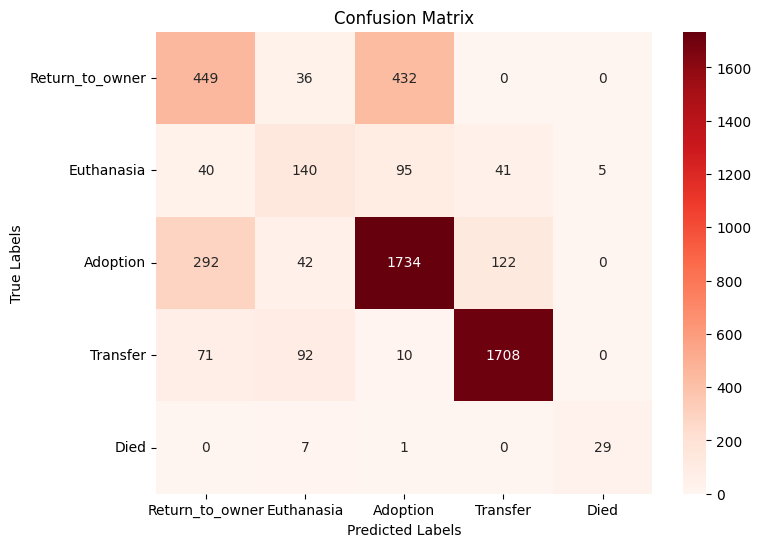

In [64]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
# Apply PCA for dimensionality reduction
pca = PCA(n_components=all_data_train.shape[1])  # Use all features
all_data_train_pca = pca.fit_transform(all_data_train)
all_data_test_pca = pca.transform(all_data_test)

# Train a Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(all_data_train_pca, all_truth_train['OutcomeType'])

# Make predictions
all_test_predictions = nb_clf.predict(all_data_test_pca)

# Classification Report
print("\nClassification Report:")
print(classification_report(all_truth_test['OutcomeType'], all_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(all_truth_test['OutcomeType'], all_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=all_decoded_labels, yticklabels=all_decoded_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.11      0.13        96
           1       0.38      0.29      0.33       140
           2       0.82      0.81      0.81       840
           3       0.86      0.91      0.88      1118
           4       0.71      0.82      0.76        33

    accuracy                           0.80      2227
   macro avg       0.58      0.59      0.58      2227
weighted avg       0.78      0.80      0.79      2227



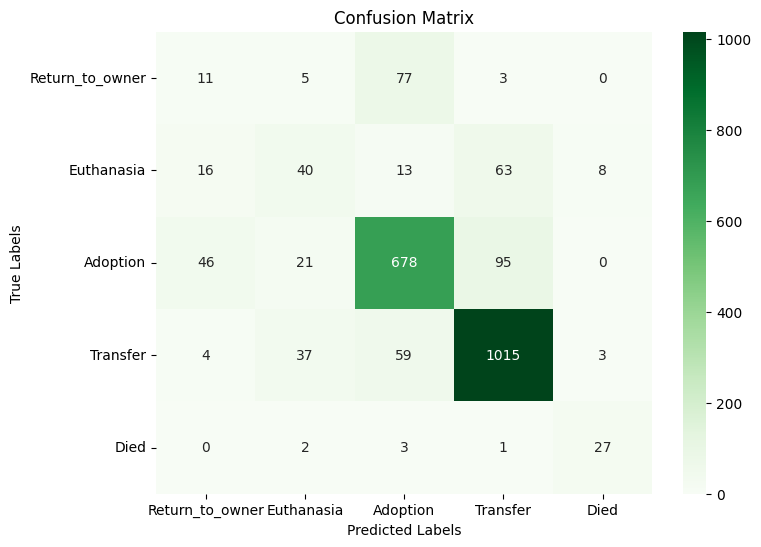

In [65]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=cats_data_train.shape[1])  # Use all features
cats_data_train_pca = pca.fit_transform(cats_data_train)
cats_data_test_pca = pca.transform(cats_data_test)

# Train a Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(cats_data_train_pca, cats_truth_train['OutcomeType'])

# Make predictions
cats_test_predictions = nb_clf.predict(cats_data_test_pca)

# Classification Report
print("\nClassification Report:")
print(classification_report(cats_truth_test['OutcomeType'], cats_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(cats_truth_test['OutcomeType'], cats_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=cats_decoded_labels, yticklabels=cats_decoded_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.41      0.50       868
           1       0.53      0.56      0.54       156
           2       0.67      0.80      0.73      1285
           3       0.89      0.94      0.91       802
           4       0.29      0.25      0.27         8

    accuracy                           0.72      3119
   macro avg       0.60      0.59      0.59      3119
weighted avg       0.71      0.72      0.70      3119



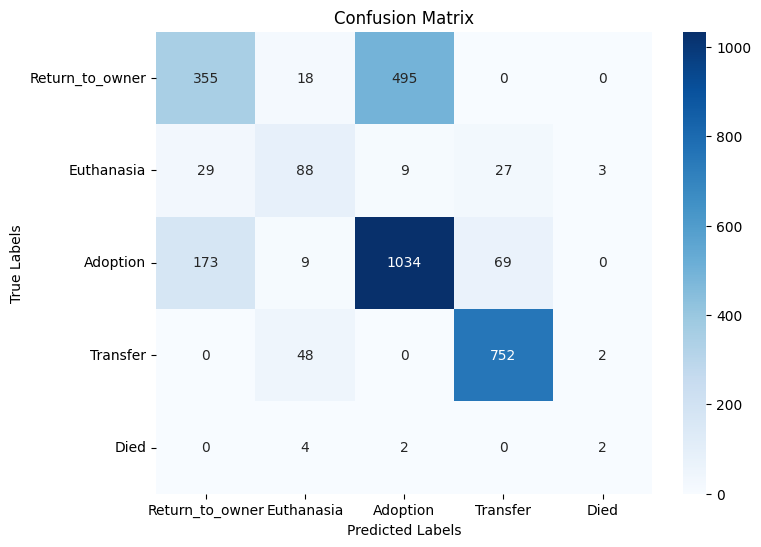

In [66]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=cats_data_train.shape[1])  # Use all features
dogs_data_train_pca = pca.fit_transform(dogs_data_train)
dogs_data_test_pca = pca.transform(dogs_data_test)

# Train a Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(dogs_data_train_pca, dogs_truth_train['OutcomeType'])

# Make predictions
dogs_test_predictions = nb_clf.predict(dogs_data_test_pca)

# Classification Report
print("\nClassification Report:")
print(classification_report(dogs_truth_test['OutcomeType'], dogs_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(dogs_truth_test['OutcomeType'], dogs_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=dogs_decoded_labels, yticklabels=dogs_decoded_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.65       917
           1       1.00      1.00      1.00       321
           2       0.85      0.88      0.86      2190
           3       1.00      1.00      1.00      1881
           4       1.00      0.92      0.96        37

    accuracy                           0.88      5346
   macro avg       0.90      0.88      0.89      5346
weighted avg       0.88      0.88      0.88      5346



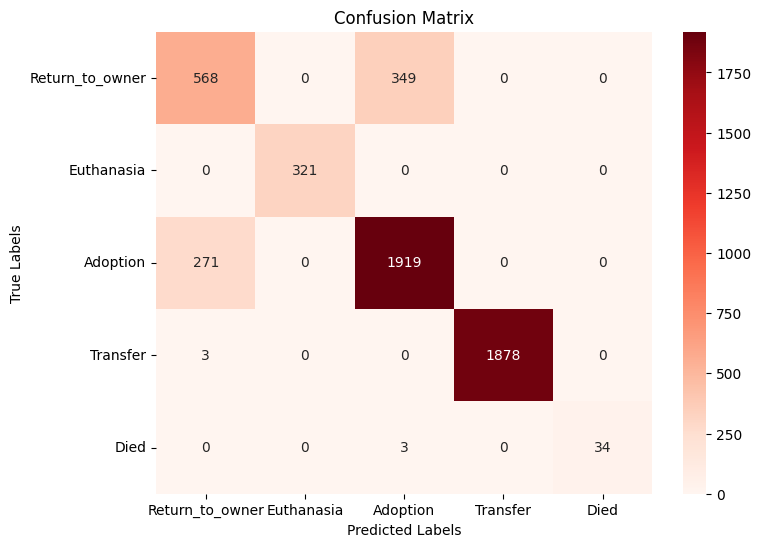

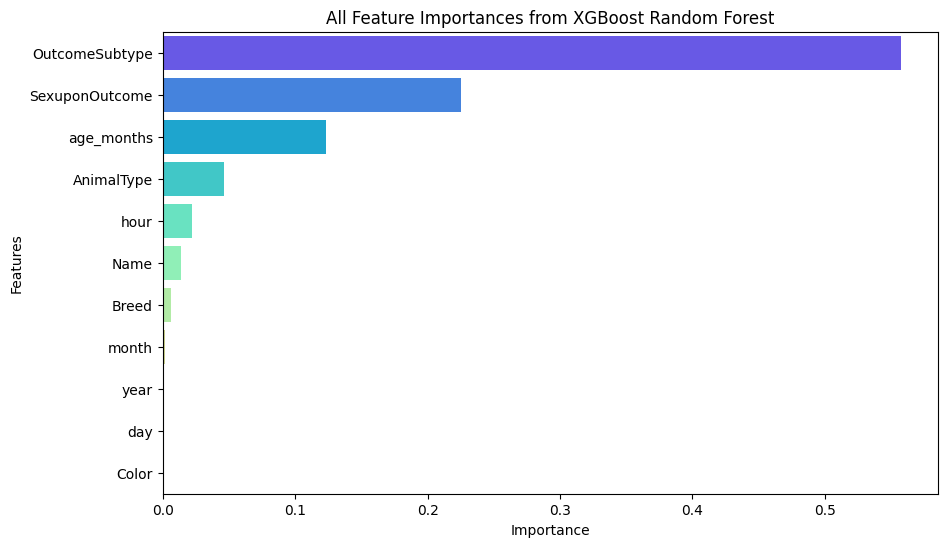

In [67]:
from xgboost import XGBRFClassifier
# Train the XGBoost Random Forest Classifier
xgbrf_clf = XGBRFClassifier(
    # n_estimators=100,  # Number of trees
    # max_depth=6,       # Maximum tree depth
    # learning_rate=0.1, # Learning rate (XGBoost RF still uses boosting)
    # random_state=42,
    # subsample=0.8,     # Subsampling ratio for each tree
    # colsample_bynode=0.8  # Feature subsampling for each node
)
xgbrf_clf.fit(all_data_train, all_truth_train['OutcomeType'])

# Make predictions
all_test_predictions = xgbrf_clf.predict(all_data_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(all_truth_test['OutcomeType'], all_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(all_truth_test['OutcomeType'], all_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt='d', cmap='Reds',
    xticklabels=all_decoded_labels, yticklabels=all_decoded_labels
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Get feature importances from the XGBoost Random Forest model
importances = xgbrf_clf.feature_importances_
features = all_features.columns
feature_importances = pd.DataFrame({
    'Importance': importances,
    'Features': features
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feature_importances, hue='Features', palette='rainbow')
plt.title('All Feature Importances from XGBoost Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.15      0.25        96
           1       1.00      1.00      1.00       140
           2       0.91      1.00      0.95       840
           3       1.00      1.00      1.00      1118
           4       0.97      0.91      0.94        33

    accuracy                           0.96      2227
   macro avg       0.94      0.81      0.83      2227
weighted avg       0.96      0.96      0.95      2227



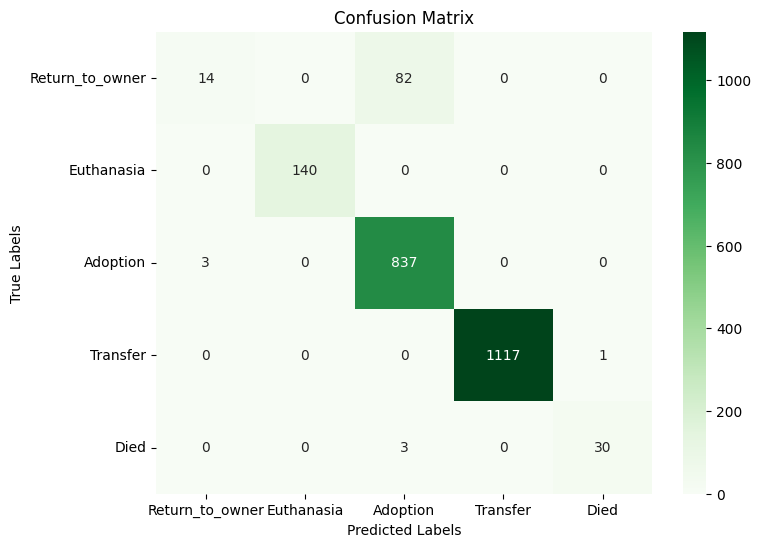

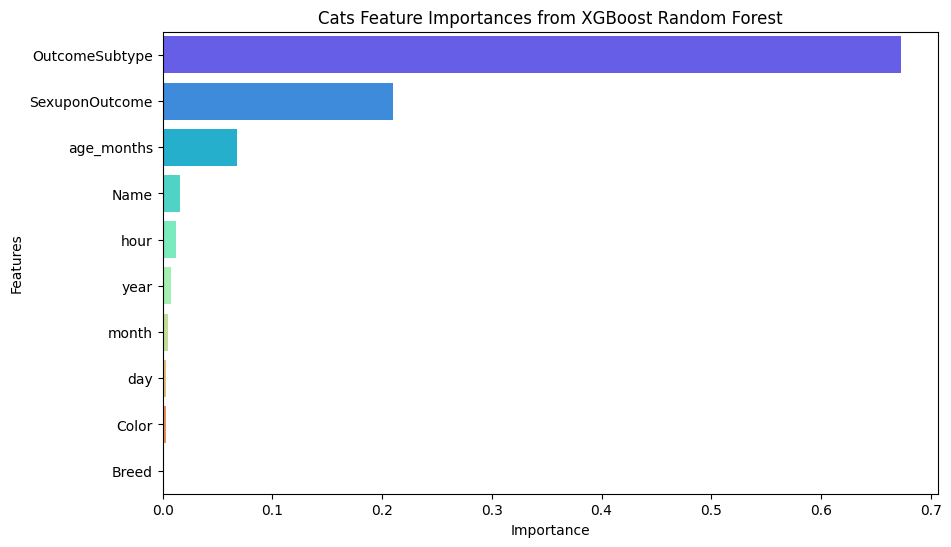

In [68]:
# Train the XGBoost Random Forest Classifier
xgbrf_clf = XGBRFClassifier(
    # n_estimators=100,  # Number of trees
    # max_depth=6,       # Maximum tree depth
    # learning_rate=0.1, # Learning rate (XGBoost RF still uses boosting)
    # random_state=42,
    # subsample=0.8,     # Subsampling ratio for each tree
    # colsample_bynode=0.8  # Feature subsampling for each node
)
xgbrf_clf.fit(cats_data_train, cats_truth_train['OutcomeType'])

# Make predictions
cats_test_predictions = xgbrf_clf.predict(cats_data_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(cats_truth_test['OutcomeType'], cats_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(cats_truth_test['OutcomeType'], cats_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt='d', cmap='Greens',
    xticklabels=cats_decoded_labels, yticklabels=cats_decoded_labels
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Get feature importances from the XGBoost Random Forest model
importances = xgbrf_clf.feature_importances_
features = cats_features.columns
feature_importances = pd.DataFrame({
    'Importance': importances,
    'Features': features
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feature_importances, hue='Features', palette='rainbow')
plt.title('Cats Feature Importances from XGBoost Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       868
           1       1.00      1.00      1.00       156
           2       0.76      0.78      0.77      1285
           3       1.00      1.00      1.00       802
           4       1.00      0.75      0.86         8

    accuracy                           0.81      3119
   macro avg       0.89      0.83      0.86      3119
weighted avg       0.81      0.81      0.81      3119



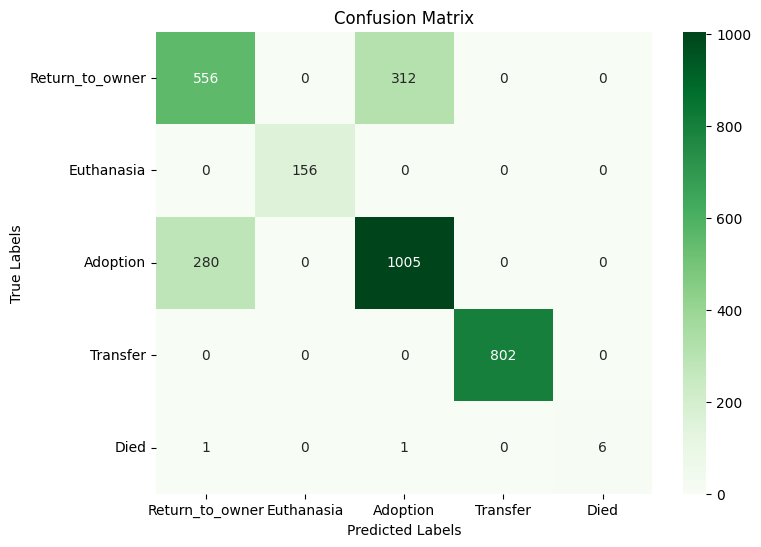

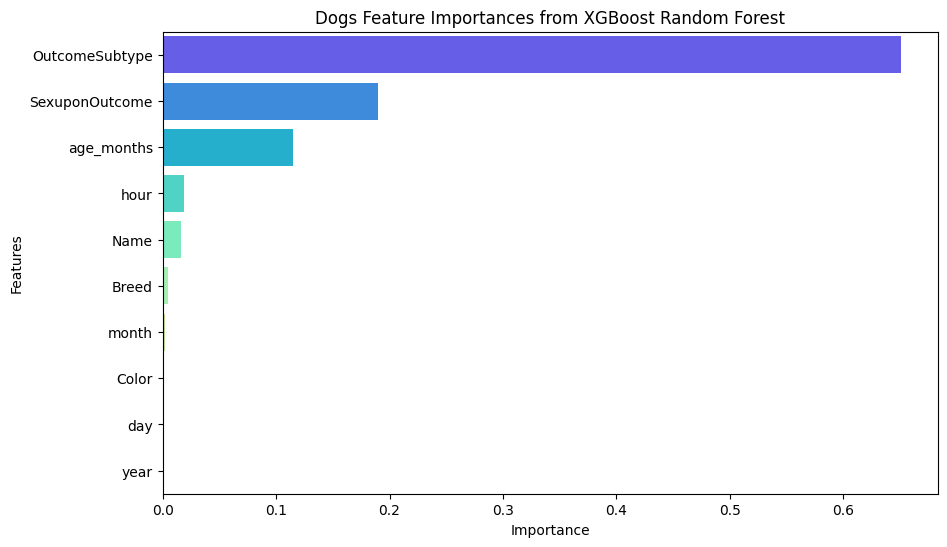

In [69]:
# Train the XGBoost Random Forest Classifier
xgbrf_clf = XGBRFClassifier(
    # n_estimators=100,  # Number of trees
    # max_depth=6,       # Maximum tree depth
    # learning_rate=0.1, # Learning rate (XGBoost RF still uses boosting)
    # random_state=42,
    # subsample=0.8,     # Subsampling ratio for each tree
    # colsample_bynode=0.8  # Feature subsampling for each node
)
xgbrf_clf.fit(dogs_data_train, dogs_truth_train['OutcomeType'])

# Make predictions
dogs_test_predictions = xgbrf_clf.predict(dogs_data_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(dogs_truth_test['OutcomeType'], dogs_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(dogs_truth_test['OutcomeType'], dogs_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt='d', cmap='Greens',
    xticklabels=dogs_decoded_labels, yticklabels=dogs_decoded_labels
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Get feature importances from the XGBoost Random Forest model
importances = xgbrf_clf.feature_importances_
features = dogs_features.columns
feature_importances = pd.DataFrame({
    'Importance': importances,
    'Features': features
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feature_importances, hue='Features', palette='rainbow')
plt.title('Dogs Feature Importances from XGBoost Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Epoch 1/20
535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5706 - loss: 1.1729 - recall: 0.1808 - val_accuracy: 0.6773 - val_loss: 0.8237 - val_recall: 0.5581
Epoch 2/20
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6994 - loss: 0.7797 - recall: 0.5890 - val_accuracy: 0.7414 - val_loss: 0.6904 - val_recall: 0.6626
Epoch 3/20
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7452 - loss: 0.6826 - recall: 0.6729 - val_accuracy: 0.7622 - val_loss: 0.6321 - val_recall: 0.7103
Epoch 4/20
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7570 - loss: 0.6215 - recall: 0.7171 - val_accuracy: 0.7643 - val_loss: 0.5918 - val_recall: 0.7395
Epoch 5/20
535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7664 - loss: 0.5803 - recall: 0.7411 - val_accuracy: 0.7650 - val_loss: 0.5663 - val_recall: 0.7435
Epoch 6/20
535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7760 - loss: 0.5505 - recall: 0.7555 - val_accuracy: 0.7765 - val_loss: 0.5355 - val_recall: 0.7606
Epoc

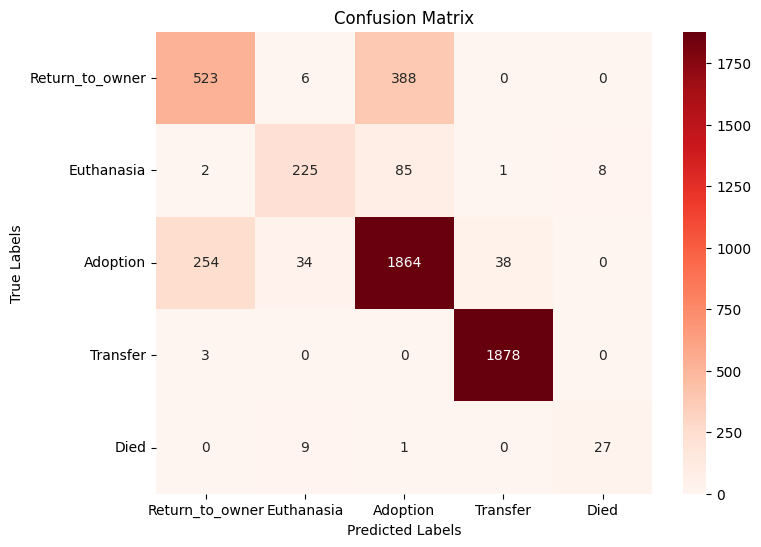

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical

# Convert target to categorical for multi-class classification
num_classes = len(all_truth_train['OutcomeType'].unique())
all_truth_train_encoded = to_categorical(all_truth_train['OutcomeType'], num_classes=num_classes)
all_truth_test_encoded = to_categorical(all_truth_test['OutcomeType'], num_classes=num_classes)

# Build a basic neural network model
model = Sequential([
    Input((all_data_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'recall'])

# Train the model
history = model.fit(
    all_data_train, all_truth_train_encoded,
    epochs=20,  # You can adjust epochs for better training
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1
)

# Make predictions
all_test_predictions_prob = model.predict(all_data_test)
all_test_predictions = all_test_predictions_prob.argmax(axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(all_truth_test['OutcomeType'], all_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(all_truth_test['OutcomeType'], all_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt='d', cmap='Reds',
    xticklabels=all_decoded_labels, yticklabels=all_decoded_labels
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5186 - loss: 1.2883 - recall: 0.1214 - val_accuracy: 0.7407 - val_loss: 0.8612 - val_recall: 0.5976
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7658 - loss: 0.8174 - recall: 0.6509 - val_accuracy: 0.7621 - val_loss: 0.7188 - val_recall: 0.7054
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7809 - loss: 0.6936 - recall: 0.7324 - val_accuracy: 0.7918 - val_loss: 0.6243 - val_recall: 0.7458
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8086 - loss: 0.5898 - recall: 0.7683 - val_accuracy: 0.8143 - val_loss: 0.5540 - val_recall: 0.7710
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8123 - loss: 0.5597 - recall: 0.7677 - val_accuracy: 0.8294 - val_loss: 0.5083 - val_recall: 0.7941
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8323 - loss: 0.5076 - recall: 0.7985 - val_accuracy: 0.8457 - val_loss: 0.4694 - val_recall: 0.8098
Epoc

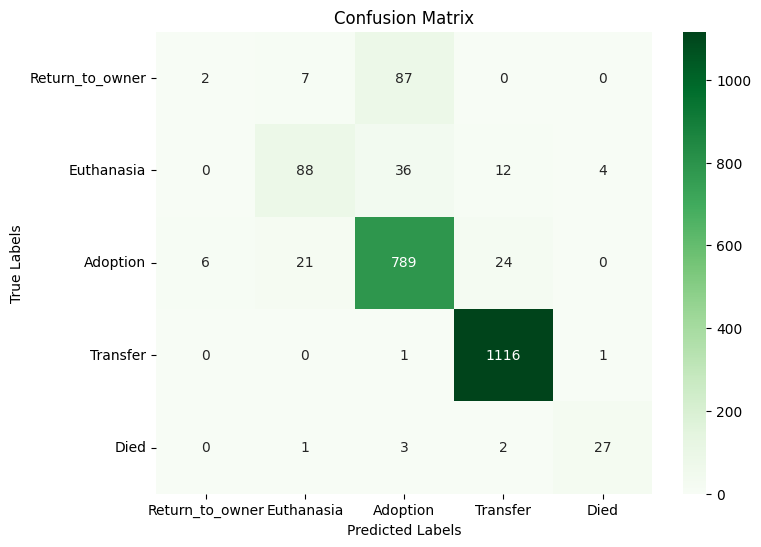

In [71]:
# Convert target to categorical for multi-class classification
num_classes = len(cats_truth_train['OutcomeType'].unique())
cats_truth_train_encoded = to_categorical(cats_truth_train['OutcomeType'], num_classes=num_classes)
cats_truth_test_encoded = to_categorical(cats_truth_test['OutcomeType'], num_classes=num_classes)

# Build a basic neural network model
model = Sequential([
    Input((cats_data_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'recall'])

# Train the model
history = model.fit(
    cats_data_train, cats_truth_train_encoded,
    epochs=20,  # You can adjust epochs for better training
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1
)

# Make predictions
cats_test_predictions_prob = model.predict(cats_data_test)
cats_test_predictions = cats_test_predictions_prob.argmax(axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(cats_truth_test['OutcomeType'], cats_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(cats_truth_test['OutcomeType'], cats_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt='d', cmap='Greens',
    xticklabels=cats_decoded_labels, yticklabels=cats_decoded_labels
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3335 - loss: 1.4103 - recall: 0.0097 - val_accuracy: 0.5908 - val_loss: 1.0121 - val_recall: 0.3114
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5948 - loss: 0.9733 - recall: 0.3456 - val_accuracy: 0.6497 - val_loss: 0.8429 - val_recall: 0.5090
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6685 - loss: 0.8380 - recall: 0.5021 - val_accuracy: 0.7094 - val_loss: 0.7552 - val_recall: 0.6028
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6994 - loss: 0.7531 - recall: 0.5944 - val_accuracy: 0.7126 - val_loss: 0.7074 - val_recall: 0.6577
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7072 - loss: 0.7136 - recall: 0.6544 - val_accuracy: 0.7174 - val_loss: 0.6743 - val_recall: 0.6814
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7123 - loss: 0.6796 - recall: 0.6796 - val_accuracy: 0.7162 - val_loss: 0.6494 - val_recall: 0.6958
Epoc

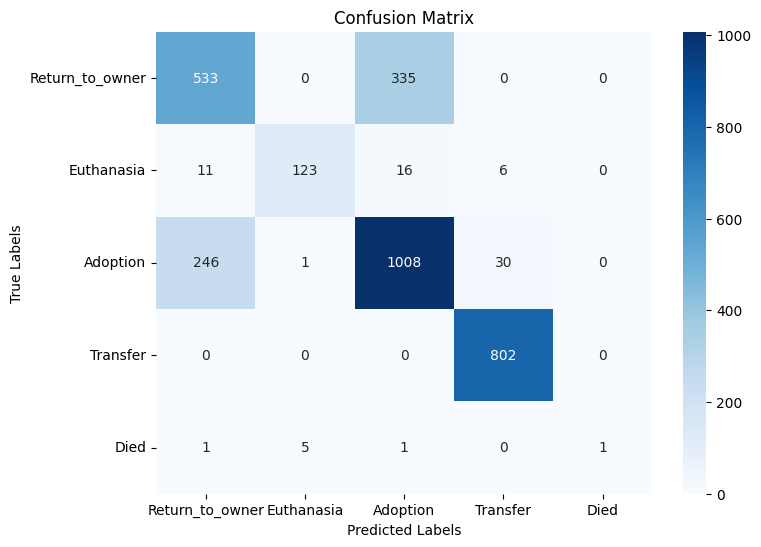

In [72]:
# Convert target to categorical for multi-class classification
num_classes = len(dogs_truth_train['OutcomeType'].unique())
dogs_truth_train_encoded = to_categorical(dogs_truth_train['OutcomeType'], num_classes=num_classes)
dogs_truth_test_encoded = to_categorical(dogs_truth_test['OutcomeType'], num_classes=num_classes)

# Build a basic neural network model
model = Sequential([
    Input((dogs_data_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'recall'])

# Train the model
history = model.fit(
    dogs_data_train, dogs_truth_train_encoded,
    epochs=20,  # You can adjust epochs for better training
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1
)

# Make predictions
dogs_test_predictions_prob = model.predict(dogs_data_test)
dogs_test_predictions = dogs_test_predictions_prob.argmax(axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(dogs_truth_test['OutcomeType'], dogs_test_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(dogs_truth_test['OutcomeType'], dogs_test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt='d', cmap='Blues',
    xticklabels=dogs_decoded_labels, yticklabels=dogs_decoded_labels
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# By this point we know clustering is more effective and the XGBoost and RF classifiers are the top performers. So we can make a 5-Fold Cross Validation to see which is performing better

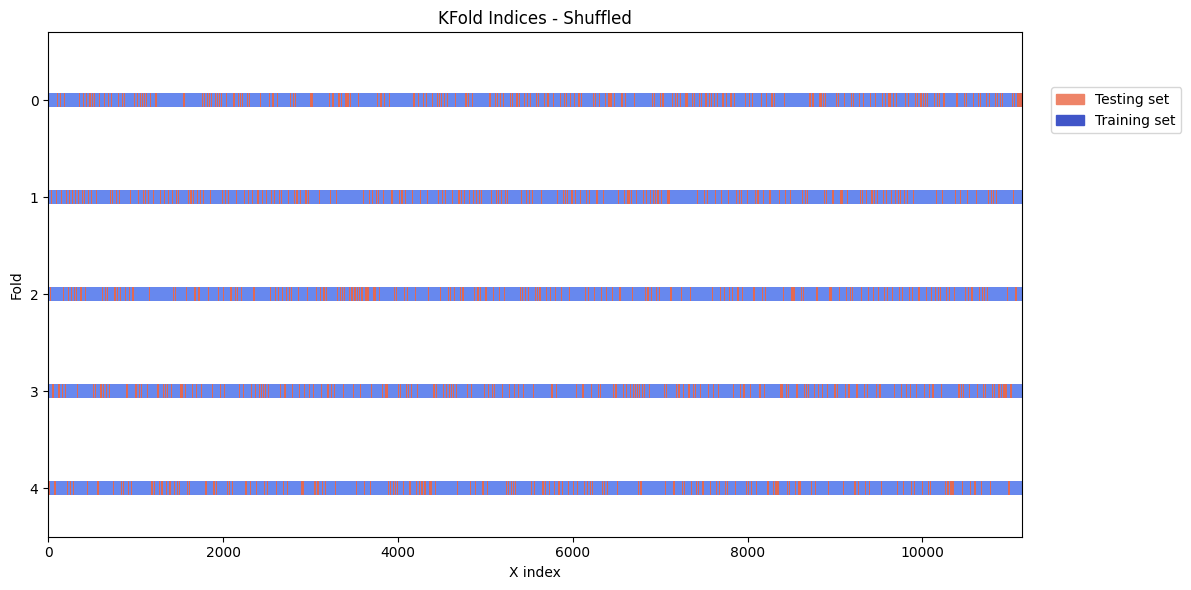

In [73]:
from matplotlib.patches import Patch

Kf = KFold(n_splits=5,
          shuffle=True, random_state=0
)

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each fold and assign colors
cmap_cv = plt.cm.coolwarm  # Color map
for fold_idx, (train_idx, val_idx) in enumerate(Kf.split(cats)):
    # Create an array of NaNs and fill in training/testing indices
    indices = np.full(len(cats), np.nan)
    indices[val_idx], indices[train_idx] = 1, 0

    # Plot the training and testing indices
    ax_x = range(len(indices))
    ax_y = [fold_idx + 0.5] * len(indices)
    ax.scatter(ax_x, ax_y, c=indices, marker="_",
               lw=10, cmap=cmap_cv, vmin=-0.2, vmax=1.2)

# Set y-ticks and labels
n_splits = 5
y_ticks = np.arange(n_splits) + 0.5
ax.set(yticks=y_ticks, yticklabels=range(n_splits),
       xlabel="X index", ylabel="Fold",
       ylim=[n_splits, -0.2], xlim=[0, len(cats)])

# Set plot title and create legend
ax.set_title("KFold Indices - Shuffled")
legend_patches = [Patch(color=cmap_cv(0.8), label="Testing set"),
                  Patch(color=cmap_cv(0.02), label="Training set")]
ax.legend(handles=legend_patches, loc=(1.03, 0.8))

# Adjust layout
plt.tight_layout()
plt.show()

In [74]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

for train_idx, val_idx in Kf.split(cats):
  # create a new model & train it
  cats_rf_model = RandomForestClassifier(random_state=0)
  cats_rf_model.fit(cats_scaled.iloc[train_idx], cats_outcomes.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = cats_rf_model.predict(cats_scaled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(cats_outcomes.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(cats_outcomes.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

cats_RF_acc_scores = pd.Series(acc_scores)
cats_RF_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {cats_RF_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {cats_RF_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.955
Average 5-fold recall: 0.830


In [75]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

for train_idx, val_idx in Kf.split(dogs):
  # create a new model & train it
  dogs_rf_model = RandomForestClassifier(random_state=0)
  dogs_rf_model.fit(dogs_scaled.iloc[train_idx], dogs_outcomes.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = dogs_rf_model.predict(dogs_scaled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(dogs_outcomes.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(dogs_outcomes.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

dogs_RF_acc_scores = pd.Series(acc_scores)
dogs_RF_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {dogs_RF_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {dogs_RF_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.814
Average 5-fold recall: 0.790


In [76]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

for train_idx, val_idx in Kf.split(cats):
  # create a new model & train it
  cats_rf_model = XGBRFClassifier()
  cats_rf_model.fit(cats_scaled.iloc[train_idx], cats_outcomes.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = cats_rf_model.predict(cats_scaled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(cats_outcomes.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(cats_outcomes.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

cats_XG_acc_scores = pd.Series(acc_scores)
cats_XG_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {cats_XG_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {cats_XG_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.957
Average 5-fold recall: 0.811


In [77]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

for train_idx, val_idx in Kf.split(dogs):
  # create a new model & train it
  dogs_rf_model = XGBRFClassifier()
  dogs_rf_model.fit(dogs_scaled.iloc[train_idx], dogs_outcomes.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = dogs_rf_model.predict(dogs_scaled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(dogs_outcomes.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(dogs_outcomes.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

dogs_XG_acc_scores = pd.Series(acc_scores)
dogs_XG_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {dogs_XG_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {dogs_XG_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.818
Average 5-fold recall: 0.861


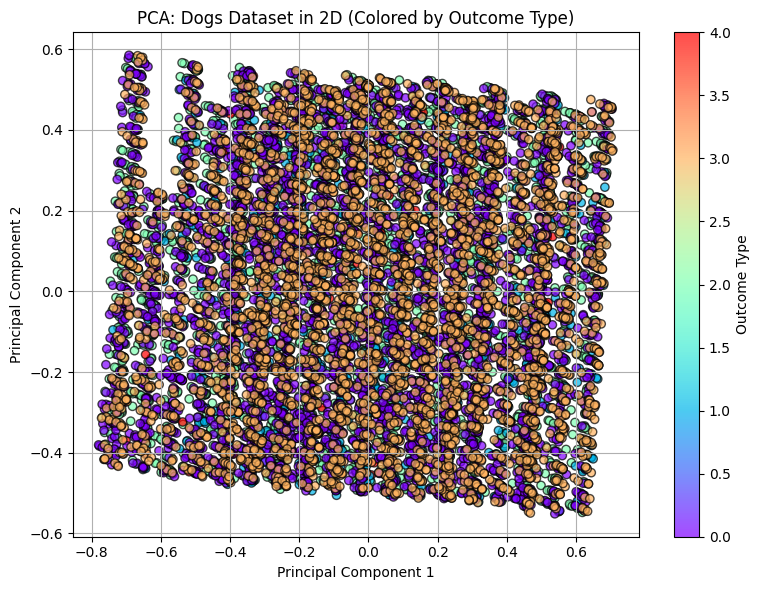

In [78]:
from numpy import cumsum
from sklearn.decomposition import PCA

# Fit PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dogs_scaled)

# Plotting in 2D with rainbow colormap based on Outcome Type
plt.figure(figsize=(8, 6))

# Scatter plot with color map
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=dogs_outcomes['OutcomeType'], cmap='rainbow', edgecolor='k', alpha=0.7)

# Add color bar to show mapping of colors to Outcome Type
plt.colorbar(label='Outcome Type')

# Add labels and title
plt.title('PCA: Dogs Dataset in 2D (Colored by Outcome Type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

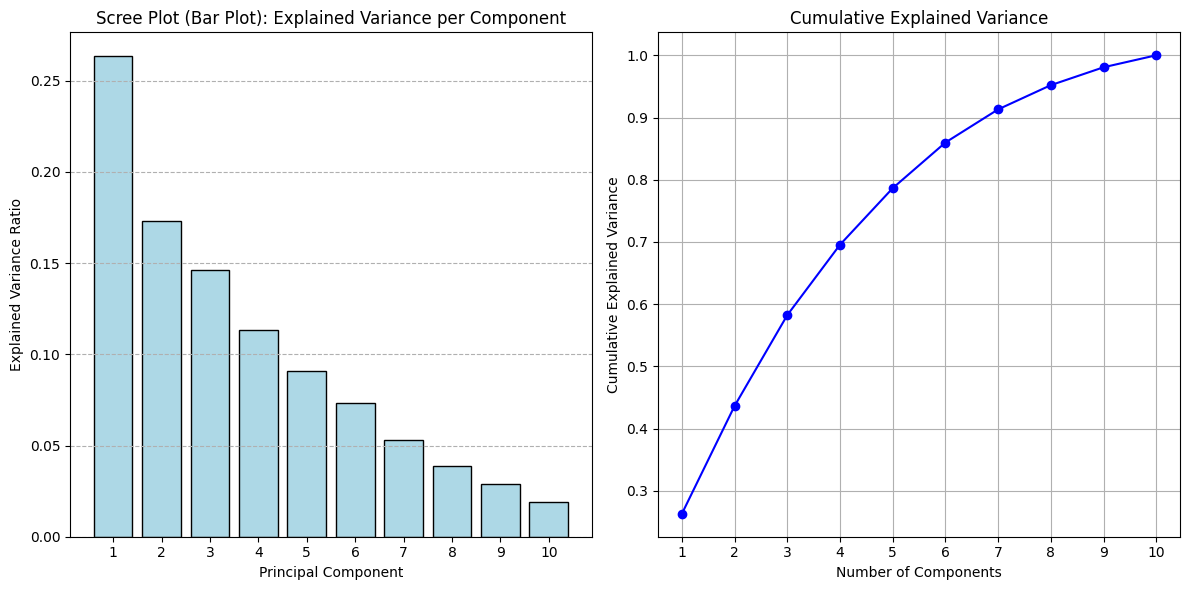

In [79]:
# Fit PCA on the dogs_features dataset
pca = PCA()
pca.fit(dogs_scaled)

# Get explained variance ratio (percentage of variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance (sum of explained variance up to each component)
cumulative_explained_variance = cumsum(explained_variance_ratio)

# Plot the explained variance for each component
plt.figure(figsize=(12, 6))

# Create bar plot to simulate a box plot appearance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='lightblue', edgecolor='black')
plt.title('Scree Plot (Bar Plot): Explained Variance per Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, axis='y', linestyle='--')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='blue')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()


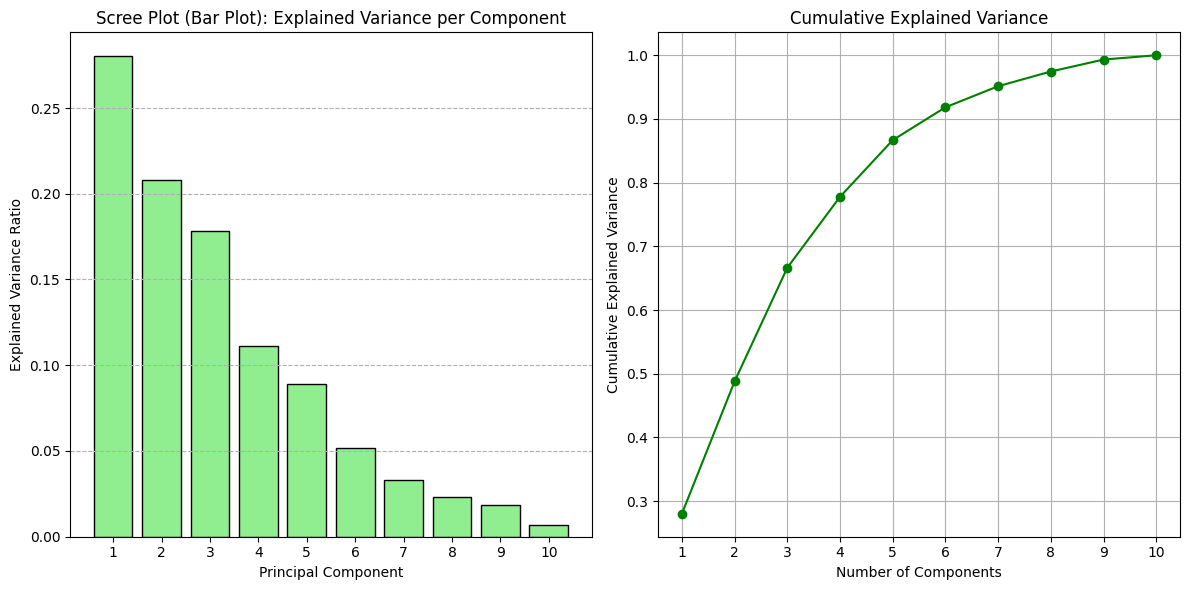

In [80]:
# Fit PCA on the dogs_features dataset
pca = PCA()
pca.fit(cats_scaled)

# Get explained variance ratio (percentage of variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance (sum of explained variance up to each component)
cumulative_explained_variance = cumsum(explained_variance_ratio)

# Plot the explained variance for each component
plt.figure(figsize=(12, 6))

# Create bar plot to simulate a box plot appearance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='lightgreen', edgecolor='black')
plt.title('Scree Plot (Bar Plot): Explained Variance per Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, axis='y', linestyle='--')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()


In [81]:
# Set up 5-fold cross-validation
Kf = KFold(n_splits=5, shuffle=True, random_state=0)

# PCA setup with 7 components
pca = PCA(n_components=7)
dogs_pca = pd.DataFrame(pca.fit_transform(dogs_scaled))

for train_idx, val_idx in Kf.split(dogs_pca):
    x_train = dogs_pca.iloc[train_idx]
    x_val = dogs_pca.iloc[val_idx]

    # Create a new model & train it
    dogs_NB_model = GaussianNB()
    dogs_NB_model.fit(x_train, dogs_outcomes.iloc[train_idx]['OutcomeType'])
    predictions = dogs_NB_model.predict(x_val)

    # Collect the classification report
    acc_scores.append(accuracy_score(dogs_outcomes.iloc[val_idx]['OutcomeType'], predictions))
    recall_scores.append(recall_score(dogs_outcomes.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

# Create Pandas Series for accuracy and recall scores
dogs_NB_acc_scores = pd.Series(acc_scores)
dogs_NB_recall_scores = pd.Series(recall_scores)

# Print the average accuracy and recall for the 5 folds
print(f'Average {Kf.get_n_splits()}-fold accuracy: {dogs_NB_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {dogs_NB_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.681
Average 5-fold recall: 0.593


In [82]:
# Set up 5-fold cross-validation
Kf = KFold(n_splits=5, shuffle=True, random_state=0)

# PCA setup with 6 components
pca = PCA(n_components=6)
cats_pca = pd.DataFrame(pca.fit_transform(cats_scaled))

for train_idx, val_idx in Kf.split(cats_pca):
    x_train = cats_pca.iloc[train_idx]
    x_val = cats_pca.iloc[val_idx]

    # Create a new model & train it
    cats_NB_model = GaussianNB()
    cats_NB_model.fit(x_train, cats_outcomes.iloc[train_idx]['OutcomeType'])
    predictions = cats_NB_model.predict(x_val)

    # Collect the classification report
    acc_scores.append(accuracy_score(cats_outcomes.iloc[val_idx]['OutcomeType'], predictions))
    recall_scores.append(recall_score(cats_outcomes.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

# Create Pandas Series for accuracy and recall scores
cats_NB_acc_scores = pd.Series(acc_scores)
cats_NB_recall_scores = pd.Series(recall_scores)

# Print the average accuracy and recall for the 5 folds
print(f'Average {Kf.get_n_splits()}-fold accuracy: {cats_NB_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {cats_NB_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.698
Average 5-fold recall: 0.511


In [83]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

for train_idx, val_idx in Kf.split(cats):
  # create a new model & train it
  cats_rf_model = KNeighborsClassifier()
  cats_rf_model.fit(cats_scaled.iloc[train_idx], cats_outcomes.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = cats_rf_model.predict(cats_scaled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(cats_outcomes.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(cats_outcomes.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

cats_KNN_acc_scores = pd.Series(acc_scores)
cats_KNN_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {cats_KNN_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {cats_KNN_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.838
Average 5-fold recall: 0.589


In [84]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

for train_idx, val_idx in Kf.split(dogs):
  # create a new model & train it
  dogs_rf_model = KNeighborsClassifier()
  dogs_rf_model.fit(dogs_scaled.iloc[train_idx], dogs_outcomes.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = dogs_rf_model.predict(dogs_scaled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(dogs_outcomes.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(dogs_outcomes.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

dogs_KNN_acc_scores = pd.Series(acc_scores)
dogs_KNN_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {dogs_KNN_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {dogs_KNN_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.643
Average 5-fold recall: 0.476


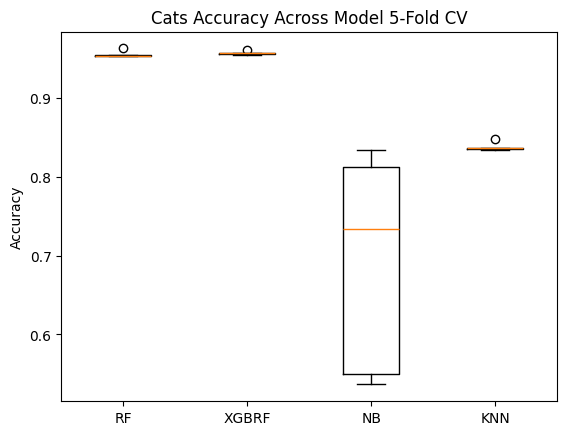

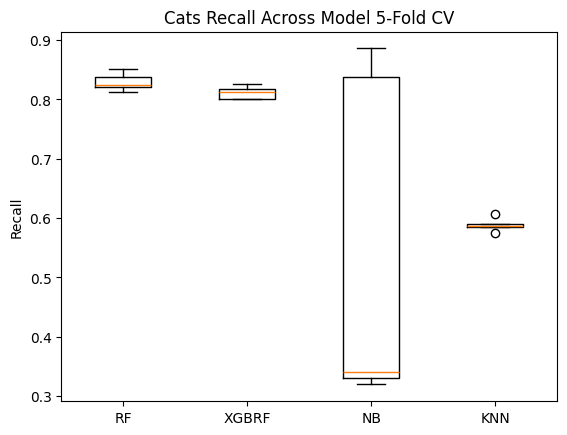

In [85]:
plt.boxplot([cats_RF_acc_scores, cats_XG_acc_scores, cats_NB_acc_scores, cats_KNN_acc_scores], labels=['RF', 'XGBRF', 'NB', 'KNN'])
plt.title('Cats Accuracy Across Model 5-Fold CV')
plt.ylabel('Accuracy')
plt.show()
plt.boxplot([cats_RF_recall_scores, cats_XG_recall_scores, cats_NB_recall_scores, cats_KNN_recall_scores], labels=['RF', 'XGBRF', 'NB', 'KNN'])
plt.title('Cats Recall Across Model 5-Fold CV')
plt.ylabel('Recall')
plt.show()

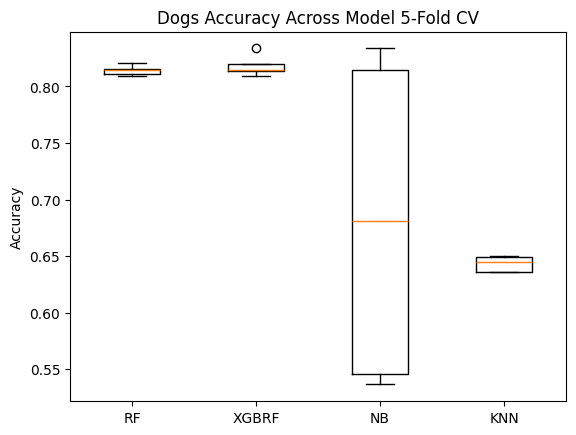

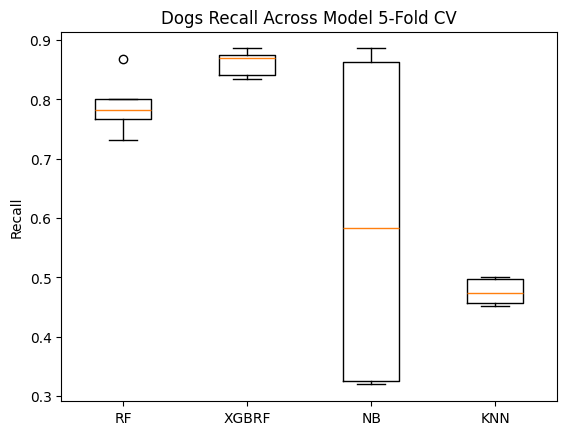

In [86]:
plt.boxplot([dogs_RF_acc_scores, dogs_XG_acc_scores, dogs_NB_acc_scores, dogs_KNN_acc_scores], labels=['RF', 'XGBRF', 'NB', 'KNN'])
plt.title('Dogs Accuracy Across Model 5-Fold CV')
plt.ylabel('Accuracy')
plt.show()
plt.boxplot([dogs_RF_recall_scores, dogs_XG_recall_scores, dogs_NB_recall_scores, dogs_KNN_recall_scores], labels=['RF', 'XGBRF', 'NB', 'KNN'])
plt.title('Dogs Recall Across Model 5-Fold CV')
plt.ylabel('Recall')
plt.show()

In [87]:
# Doing it all again but with SMOTE
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=0)

# resample the dataset & visualize
cats_features_resampled, cats_outcomes_resampled = smote.fit_resample(cats_scaled, cats_outcomes['OutcomeType'])
dogs_features_resampled, dogs_outcomes_resampled = smote.fit_resample(dogs_scaled, dogs_outcomes['OutcomeType'])

cats_map = {index: value for index, value in enumerate(cats_decoded_labels)}
cats_outcomes_resampled = pd.concat([cats_outcomes_resampled, cats_outcomes_resampled.map(cats_map)], keys=['OutcomeType', 'Outcome'], axis=1)
dogs_map = {index: value for index, value in enumerate(dogs_decoded_labels)}
dogs_outcomes_resampled = pd.concat([dogs_outcomes_resampled, dogs_outcomes_resampled.map(dogs_map)], keys=['OutcomeType', 'Outcome'], axis=1)

cats_features_resampled = pd.DataFrame(cats_features_resampled)
dogs_features_resampled = pd.DataFrame(dogs_features_resampled)
cats_outcomes_resampled

,OutcomeType,Outcome
0,2,Adoption
1,2,Adoption
2,2,Adoption
3,2,Adoption
4,2,Adoption
...,...,...
27520,4,Died
27521,4,Died
27522,4,Died
27523,4,Died


In [88]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

Kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_idx, val_idx in Kf.split(cats_outcomes_resampled):
  # create a new model & train it
  cats_rf_model = RandomForestClassifier(random_state=0)
  cats_rf_model.fit(cats_features_resampled.iloc[train_idx], cats_outcomes_resampled.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = cats_rf_model.predict(cats_features_resampled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(cats_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(cats_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

cats_RFSMOTE_acc_scores = pd.Series(acc_scores)
cats_RFSMOTE_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {cats_RFSMOTE_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {cats_RFSMOTE_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.976
Average 5-fold recall: 0.976


In [89]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

Kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_idx, val_idx in Kf.split(dogs_outcomes_resampled):
  # create a new model & train it
  dogs_rf_model = RandomForestClassifier(random_state=0)
  dogs_rf_model.fit(dogs_features_resampled.iloc[train_idx], dogs_outcomes_resampled.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = dogs_rf_model.predict(dogs_features_resampled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(dogs_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(dogs_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

dogs_RFSMOTE_acc_scores = pd.Series(acc_scores)
dogs_RFSMOTE_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {dogs_RFSMOTE_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {dogs_RFSMOTE_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.910
Average 5-fold recall: 0.910


In [90]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

Kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_idx, val_idx in Kf.split(cats_outcomes_resampled):
  # create a new model & train it
  cats_rf_model = XGBRFClassifier()
  cats_rf_model.fit(cats_features_resampled.iloc[train_idx], cats_outcomes_resampled.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = cats_rf_model.predict(cats_features_resampled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(cats_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(cats_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

cats_XGSMOTE_acc_scores = pd.Series(acc_scores)
cats_XGSMOTE_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {cats_XGSMOTE_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {cats_XGSMOTE_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.941
Average 5-fold recall: 0.941


In [91]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

Kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_idx, val_idx in Kf.split(dogs_outcomes_resampled):
  # create a new model & train it
  dogs_rf_model = XGBRFClassifier()
  dogs_rf_model.fit(dogs_features_resampled.iloc[train_idx], dogs_outcomes_resampled.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = dogs_rf_model.predict(dogs_features_resampled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(dogs_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(dogs_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

dogs_XGSMOTE_acc_scores = pd.Series(acc_scores)
dogs_XGSMOTE_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {dogs_XGSMOTE_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {dogs_XGSMOTE_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.881
Average 5-fold recall: 0.881


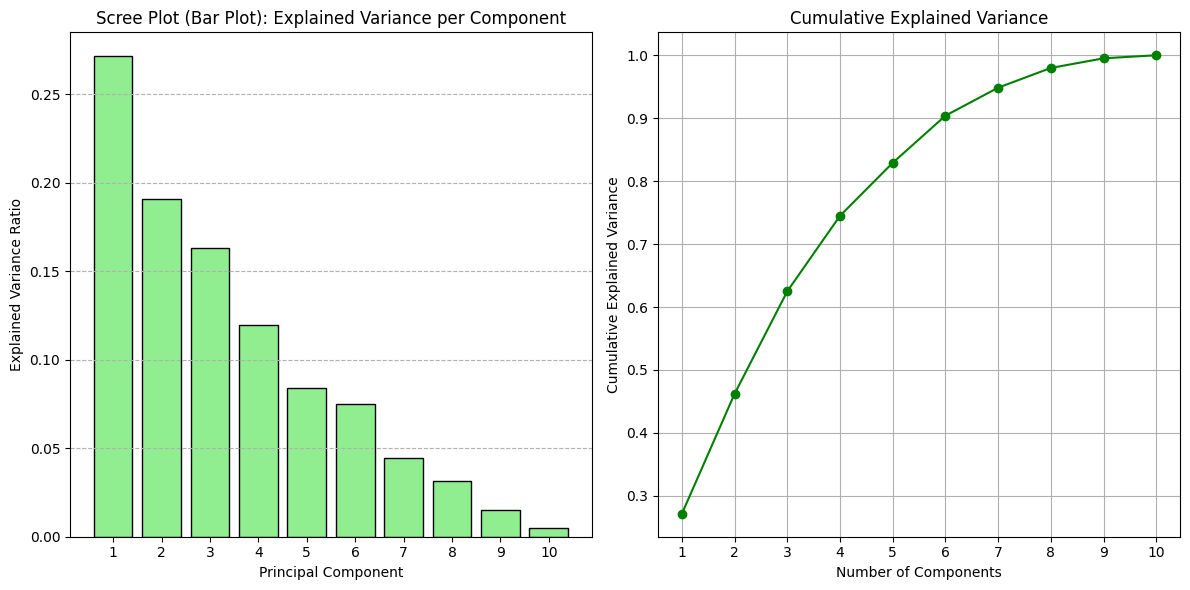

In [92]:
# Fit PCA on the dogs_features dataset
pca = PCA()
pca.fit(cats_features_resampled)

# Get explained variance ratio (percentage of variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance (sum of explained variance up to each component)
cumulative_explained_variance = cumsum(explained_variance_ratio)

# Plot the explained variance for each component
plt.figure(figsize=(12, 6))

# Create bar plot to simulate a box plot appearance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='lightgreen', edgecolor='black')
plt.title('Scree Plot (Bar Plot): Explained Variance per Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, axis='y', linestyle='--')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()

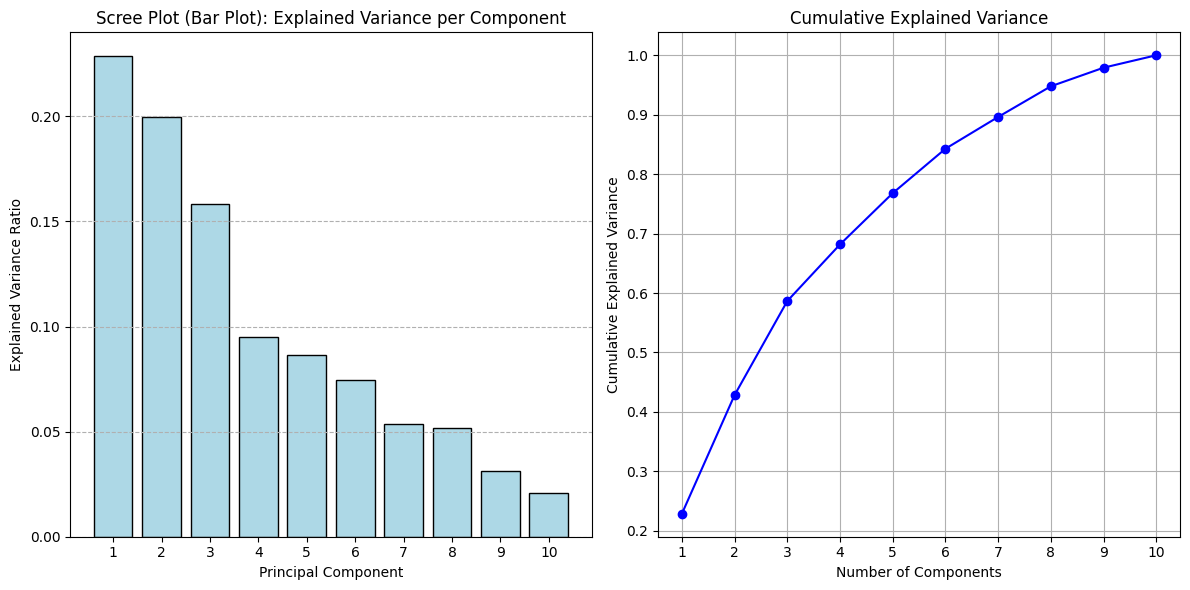

In [93]:
# Fit PCA on the dogs_features dataset
pca = PCA()
pca.fit(dogs_features_resampled)

# Get explained variance ratio (percentage of variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance (sum of explained variance up to each component)
cumulative_explained_variance = cumsum(explained_variance_ratio)

# Plot the explained variance for each component
plt.figure(figsize=(12, 6))

# Create bar plot to simulate a box plot appearance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='lightblue', edgecolor='black')
plt.title('Scree Plot (Bar Plot): Explained Variance per Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, axis='y', linestyle='--')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='blue')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()

In [94]:
# Set up 5-fold cross-validation
Kf = KFold(n_splits=5, shuffle=True, random_state=0)

# PCA setup with 6 components
pca = PCA(n_components=7)
cats_pca = pd.DataFrame(pca.fit_transform(cats_features_resampled))

for train_idx, val_idx in Kf.split(cats_pca):
    x_train = cats_pca.iloc[train_idx]
    x_val = cats_pca.iloc[val_idx]

    # Create a new model & train it
    cats_NB_model = GaussianNB()
    cats_NB_model.fit(x_train, cats_outcomes_resampled.iloc[train_idx]['OutcomeType'])
    predictions = cats_NB_model.predict(x_val)

    # Collect the classification report
    acc_scores.append(accuracy_score(cats_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions))
    recall_scores.append(recall_score(cats_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

# Create Pandas Series for accuracy and recall scores
cats_NBSMOTE_acc_scores = pd.Series(acc_scores)
cats_NBSMOTE_recall_scores = pd.Series(recall_scores)

# Print the average accuracy and recall for the 5 folds
print(f'Average {Kf.get_n_splits()}-fold accuracy: {cats_NBSMOTE_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {cats_NBSMOTE_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.769
Average 5-fold recall: 0.769


In [95]:
# Set up 5-fold cross-validation
Kf = KFold(n_splits=5, shuffle=True, random_state=0)

# PCA setup with 6 components
pca = PCA(n_components=8)
dogs_pca = pd.DataFrame(pca.fit_transform(dogs_features_resampled))

for train_idx, val_idx in Kf.split(dogs_pca):
    x_train = dogs_pca.iloc[train_idx]
    x_val = dogs_pca.iloc[val_idx]

    # Create a new model & train it
    dogs_NB_model = GaussianNB()
    dogs_NB_model.fit(x_train, dogs_outcomes_resampled.iloc[train_idx]['OutcomeType'])
    predictions = dogs_NB_model.predict(x_val)

    # Collect the classification report
    acc_scores.append(accuracy_score(dogs_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions))
    recall_scores.append(recall_score(dogs_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

# Create Pandas Series for accuracy and recall scores
dogs_NBSMOTE_acc_scores = pd.Series(acc_scores)
dogs_NBSMOTE_recall_scores = pd.Series(recall_scores)

# Print the average accuracy and recall for the 5 folds
print(f'Average {Kf.get_n_splits()}-fold accuracy: {dogs_NBSMOTE_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {dogs_NBSMOTE_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.704
Average 5-fold recall: 0.704


In [96]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

Kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_idx, val_idx in Kf.split(cats_outcomes_resampled):
  # create a new model & train it
  cats_rf_model = KNeighborsClassifier()
  cats_rf_model.fit(cats_features_resampled.iloc[train_idx], cats_outcomes_resampled.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = cats_rf_model.predict(cats_features_resampled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(cats_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(cats_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

cats_KNNSMOTE_acc_scores = pd.Series(acc_scores)
cats_KNNSMOTE_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {cats_KNNSMOTE_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {cats_KNNSMOTE_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.918
Average 5-fold recall: 0.918


In [97]:
# Collected statistics per fold
acc_scores = []
recall_scores = []

Kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_idx, val_idx in Kf.split(dogs_outcomes_resampled):
  # create a new model & train it
  dogs_rf_model = KNeighborsClassifier()
  dogs_rf_model.fit(dogs_features_resampled.iloc[train_idx], dogs_outcomes_resampled.iloc[train_idx]['OutcomeType'])

  # Aggregate the predictions for this fold
  predictions = dogs_rf_model.predict(dogs_features_resampled.iloc[val_idx])

  # collect the classification report
  acc_scores.append( accuracy_score(dogs_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions))
  recall_scores.append(recall_score(dogs_outcomes_resampled.iloc[val_idx]['OutcomeType'], predictions, average='macro'))

dogs_KNNSMOTE_acc_scores = pd.Series(acc_scores)
dogs_KNNSMOTE_recall_scores = pd.Series(recall_scores)
print(f'Average {Kf.get_n_splits()}-fold accuracy: {dogs_KNNSMOTE_acc_scores.mean():.3f}')
print(f'Average {Kf.get_n_splits()}-fold recall: {dogs_KNNSMOTE_recall_scores.mean():.3f}')

Average 5-fold accuracy: 0.825
Average 5-fold recall: 0.825


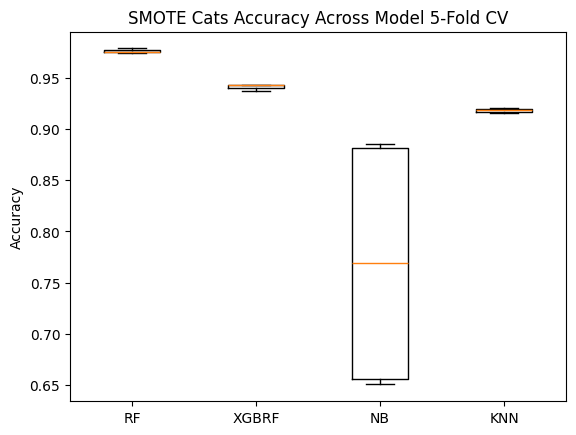

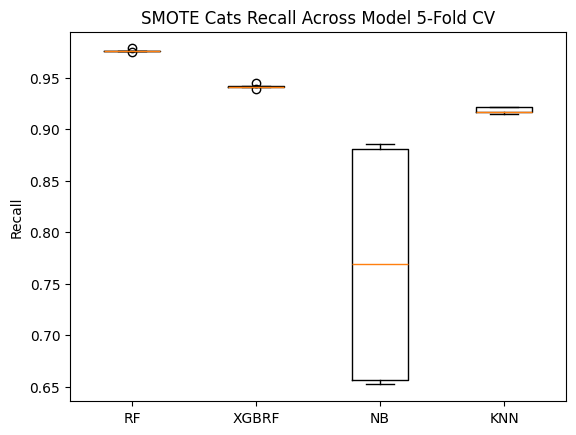

In [98]:
plt.boxplot([cats_RFSMOTE_acc_scores, cats_XGSMOTE_acc_scores, cats_NBSMOTE_acc_scores, cats_KNNSMOTE_acc_scores], labels=['RF', 'XGBRF', 'NB', 'KNN'])
plt.title('SMOTE Cats Accuracy Across Model 5-Fold CV')
plt.ylabel('Accuracy')
plt.show()
plt.boxplot([cats_RFSMOTE_recall_scores, cats_XGSMOTE_recall_scores, cats_NBSMOTE_recall_scores, cats_KNNSMOTE_recall_scores], labels=['RF', 'XGBRF', 'NB', 'KNN'])
plt.title('SMOTE Cats Recall Across Model 5-Fold CV')
plt.ylabel('Recall')
plt.show()

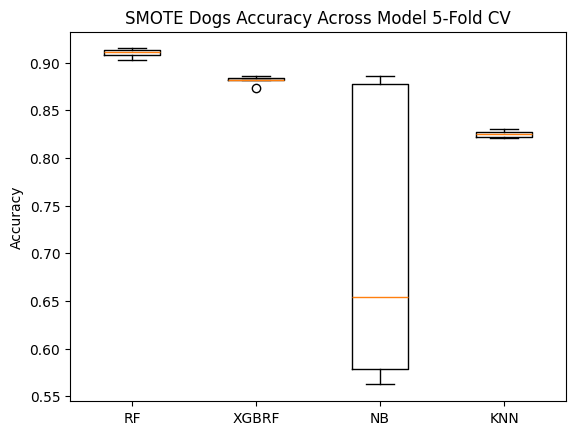

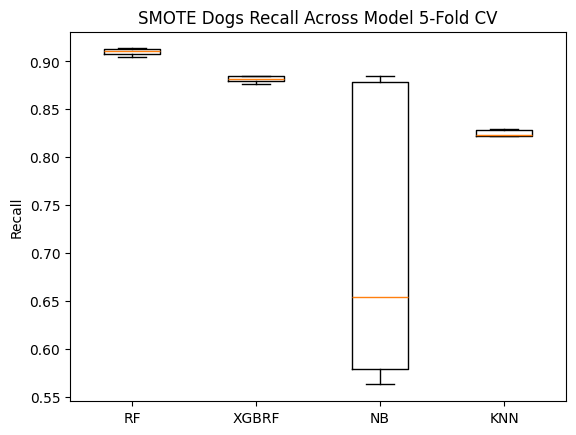

In [99]:
plt.boxplot([dogs_RFSMOTE_acc_scores, dogs_XGSMOTE_acc_scores, dogs_NBSMOTE_acc_scores, dogs_KNNSMOTE_acc_scores], labels=['RF', 'XGBRF', 'NB', 'KNN'])
plt.title('SMOTE Dogs Accuracy Across Model 5-Fold CV')
plt.ylabel('Accuracy')
plt.show()
plt.boxplot([dogs_RFSMOTE_recall_scores, dogs_XGSMOTE_recall_scores, dogs_NBSMOTE_recall_scores, dogs_KNNSMOTE_recall_scores], labels=['RF', 'XGBRF', 'NB', 'KNN'])
plt.title('SMOTE Dogs Recall Across Model 5-Fold CV')
plt.ylabel('Recall')
plt.show()

In [100]:
# H-Param Tuning with RF SMOTE
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 25, stop = 200, num = 15)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(30, 100, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
print(random_grid)

{'n_estimators': [25, 37, 50, 62, 75, 87, 100, 112, 125, 137, 150, 162, 175, 187, 200], 'max_features': ['log2', 'sqrt'], 'max_depth': [30, 37, 45, 53, 61, 68, 76, 84, 92, 100, None], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [101]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(cats_features_resampled, cats_outcomes_resampled['OutcomeType'])

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [30, 37, 45, 53, 61, 68,
                                                      76, 84, 92, 100, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [25, 37, 50, 62, 75, 87,
                                                         100, 112, 125, 137,
                                                         150, 162, 175, 187,
                                                         200]},
                   random_state=42, verbose=2)

In [102]:
rf_random.best_params_.update({'Acc/Recall': rf_random.best_score_})
my_df = pd.DataFrame([rf_random.best_params_])
my_df

,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,bootstrap,Acc/Recall
0,162,2,1,log2,53,False,0.970427


In [103]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(dogs_features_resampled, dogs_outcomes_resampled['OutcomeType'])

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [30, 37, 45, 53, 61, 68,
                                                      76, 84, 92, 100, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [25, 37, 50, 62, 75, 87,
                                                         100, 112, 125, 137,
                                                         150, 162, 175, 187,
                                                         200]},
                   random_state=42, verbose=2)

In [105]:
rf_random.best_params_.update({'Acc/Recall': rf_random.best_score_})
my_df = pd.concat([my_df, pd.DataFrame([rf_random.best_params_])], axis=0)
my_df.index = ['cats', 'dogs']

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [109]:
my_df

,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,bootstrap,Acc/Recall
cats,162,2,1,log2,53,False,0.970427
dogs,100,2,1,log2,68,True,0.885024
